# INFS7410 Project - Part 1

_version 1.3_

#### Assignment Preamble

##### Due Date
> **<mark>30 August</mark> 2024, <mark>16:00</mark> Eastern Australia Standard Time**


##### Weight
> **This assignment** (Project - Part 1) constitutes **20%** of the overall mark for INFS7410.  
(Part 1 + Part 2 = 40% of the total course grade)

##### Completion Requirements
> - You should complete it **individually**.  
> - You can check the detailed **marking sheet** provided alongside this notebook.
>   - see `INFS7410-project-part-1-marking-sheet.pdf`

##### Prerequisites Checker
You should have already tackled the activities from pracs week1-5, including:
> - *Indexing* corpus (`prac-week1`)
> - Implementing *retrieval functions* (`prac-week3`)
> - Implementing *rank fusion methods* (`prac-week4`)
> - Implementing *query expansion and reduction* from *pseudo relevance feedback*(`prac-week5`)
> - Performing *evaluation*, *visualisation*, and *statistical significance test* (`prac-week2`)

##### Tips
> - Start early to allow ample time for completion.
> - Proceed step-by-step through the assignment tasks.
> - Most of the assignment relies on knowledge and code from your computer practicals. However, be prepared for challenges that may require additional time and effort to solve.

### Aims

##### Project Aim:  
> The aim of the entire project is to implement a number of representiative information retrieval methods, evaluate and compare them in the context of real use-cases.

##### Part 1 Aim 

The aim of Part 1 is to:
> * Familiarise yourself with the basic retrieval workflow.
> * Set up the infrastructure for indexing the corpus and evaluating with queries.
> * Implement classical information retrieval methods coverd in the pracs and lectures.
> * Tune your retrieval methods to improve their effectiveness.

### The Information Retrieval Tasks: Fact Checking and Bio-Medical Retrieval

In this project, we will consider two tasks in IR:

- **Fact Checking** verifies a claim against a large collection of evidence. Here, we focus on the *scientific* domain, which ranges from *basic science* to *clinical medicine*. We verify scientific claims by retrieving evidence from a corpus of research literature containing scientific paper abstracts.
- **Bio-Medical Retrieval** involves searching for relevant scientific documents, such as research papers or blogs, in response to a specific query within the biomedical domain.

For these tasks, we will use selected datasets from the [BEIR](https://arxiv.org/pdf/2104.08663) benchmark, specifically **SciFact** (Fact checking), **NFCorpus** (Biomedical),and **TREC-COVID** (Biomedical).

### What we give you:

#### Files from Previous Practicals
You can freely re-use all the materials from `prac-week1` to `prac-week5`, e.g. your implemenation/codes.

#### Files for This Project
- `infs7410_project_collections.zip` (74.1 MB)
  - Click [here](https://drive.google.com/file/d/1CALUriFFsBuzIA76TlAySZ7o9ASdu2WS/view?usp=sharing) to **download** and **unzip**.
- `INFS7410-project-part-1.ipynb` (This notebook)
- `INFS7410-project-part-1-marking-sheet.pdf`


We provide the following collections for the project:
- **NF Corpus**: (*training + test*)
  - `./nfcorpus_corpus.jsonl`
  - `./nfcorpus/nfcorpus_train_queries.tsv`
  - `./nfcorpus/nfcorpus_train_queries.tsv`
  - `./nfcorpus/nfcorpus_train_qrels.txt`
  - `./nfcorpus/nfcorpus_test_qrels.txt`
- **SciFact**: (*training + test*)
  - `./scifact_corpus.jsonl`
  - `./scifact/scifact_train_queries.tsv`
  - `./scifact/scifact_train_queries.tsv`
  - `./scifact/scifact_train_qrels.txt`
  - `./scifact/scifact_train_qrels.txt`
- **TREC-COVID**: (*test only*)
  - `./trec-covid_corpus.jsonl`
  - `./trec-covid/trec-covid_test_qrels.txt`
  - `./trec-covid/trec-covid_test_queries.tsv`

Generally, each collection contains:

* `corpus.jsonl`: Containing the texts to be retrieved for each query.
* `queries.tsv`: Listing queries used for retrieval, each line containing a topic id and the query text.
* `qrels.txt`: Containing relevance judgements for your runs in TREC format <qid, Q0, doc_id, rank, score, tag>.

Additionally, 

**This Jupyter notebook** is the workspace where you will implement your solutions and document your findings.

Put this notebook and the provided files under the same directory.

### Overview of the IR Workflow
To conduct an experiment for the IR tasks in this project, we generally follow three key stages: `Indexing -> Retrieval -> Evaluation`. Each stage involves a corresponding portion of data from the collection. A collection typically comprises a corpus, queries, and a qrel. These are illustrated below:
<center>
<img src="project-workflow.svg" alt="drawing" width="500"/>
</center>

### What you need to do:

You are expected to deliver the following:

* **Correct implementations** and **evaluations** of **the methods** required by this project specifications.
* **Write-up** about the **retrieval methods** used, including:
  - **formula** that represent the method you implemented.
  - **code** that corresponds to the formula.
  - **evaluation settings** with explanation followed.
  - **discussion** of the findings.

Both the implementations and write-ups must be documented within this Jupyter notebook.

### Required Methods to Implement

* Indexing
  - **Pyserini index command**: You first need to index the new datasets introduced in this project. Each dataset should be made into a separate index. Check how we use the command to build index for given collections from `week1-week3`. 
* Ranking functions
  - **BM25**: Implemented by yourself, not using the one from Pyserini. Check `week3`.
* Query reformulation methods
  - **Pseudo-Relevance Feedback using BM25 for Query Expansion**: Implemented by yourself. Check `week5`.
  - **IDF-r Query Reduction**: Implemented by yourself. Check `week5`.
* Rank fusion methods
  - **Borda**: Implemented by yourself. Check `week4`.
  - **CombSUM**: Implemented by yourself. Check `week4`.
  - **CombMNZ**: Implemented by yourself. Check `week4`.

***Parameter Tuning***:

*N.B.* ONLY TUNE WITH TRAINING QUERIES.

- Tune the parameters in your **BM25**, **Query Expansion**, and **Query Reduction** implementations. Conduct a parameter search over **at least 5 carefully selected values** for each method, and **5 pairs** when the method involves **two parameters**.

- For **Rank fusion methods**, focus on fusing **the highest-performing tuned run** from each of the BM25, Query Expansion, and Query Reduction implementations.


### Required Evaluations to Perform
In this project, we provide three datasets with sampled queries the original BEIR version. You first task is to check these datasets and get familiar with the size, content, format, and consider how to process them. Pay particular attention to the differences between these datasets and the MSMARCO collection we used in the pracs. 

In Part 1 of the project, you are required to perform the following evaluations:

1. Run your **BM25** with `k=1.2, b=0.75` with the `test_queries` of `SciFact`， `NFCorpus`, and `TREC-COVID` as the **baselines**. 

2. **Tune the parameters** for **BM25**, **Query Expansion**, and **Query Reduction** with the `train_queries` of `SciFact` and `NFCorpus`. Refer to the ***Parameter Tuning*** section outlined above.

3. **Report the results** of each method from tuning in a table. Perform **statistical significance analysis** across the results of the methods and report them in the table (e.g., comparing Method_A with para-setting_a on dataset_1 with baseline on the same dataset).

4. **Select the best parameter setting** of the methods from `Sci-Fact` and `NFCorpus` seperately, and run with `test_queries` of `TREC-COVID`. **Report the results** in the table, follow the same requirements listed above.  

5. Create a **gain-loss plot** comparing **BM25vs. Pseudo-Relevance Feedback Query Expansion using BM25**, as well as plots comparing **BM25 vs. each rank fusion method** on `TREC-COVID`. Using the **baseline BM25** and the two best parameter settings from `SciFact` and `NFCorpus` for `Query Expansion`.


### Discussions
1. Comment on **trends and differences** observed in your results. Do the methods work well on `SciFact` and `NFCorpus` also **generalise** to `TREC-COVID`? Is there a method that **consistently outperforms** others on all the datasets?
2. Provide insights into whether **rank fusion** works or not, considering factors like runs included in the fusion process and query characteristics.
3. Discuss the results obtained from `SciFact` and `NFCorpus` compared to those on `TREC-COVID`. Do ranking methods perform well? Why or why not? Include the **statistical significance analysis** results comparing the baseline with the tuned methods, and each method against another (including fusion, query expansion and reduction).

### Evaluation Measures
Evaluate the retrieval methods using the following measures:

- **nDCG at 10** (`ndcg_cut_10`): Use this as the primary measure for tuning

All **gain-loss plots** should be produced with respect to **nDCG at 10**.

For **statistical significance analysis**, use the **paired t-test** and distinguish between **p < 0.05** and **p < 0.01**.

### How to submit

Submit **one** `.zip` file containing:

1. this notebook in `.ipynb` format
2. this notebook saved as a `.pdf` by navigating to the menu and selecting `File -> Save and Export Notebook As -> HTML`, then open and `Print` it with your browser.

***N.B.***
- Ensure that the code is executable. Include all your discussions and analysis within this notebook, not as a separate file.

- Don't add any runs, indexes in the zip file! (If you do this, the file will be too big and you will encounter errors in submitting.)

- Submit the file via the link on the INFS7410 course site on BlackBoard by **<mark>30 August</mark> 2024, <mark>16:00</mark> Eastern Australia Standard Time**, unless you have received an extension according to UQ policy, which must be requested **before** the assignment due date.

## 1. Check datasets and perform indexing
----

**Note:** Try out different indexes to find the most effective setup for your needs.

First, have a look at the datasets. Then, try to use the indexing command from pracs. Remember to add `-storeDocvectors`.

You may want to store your indexes under `./indexes/`.

You can check the  [pyserini guidance](https://github.com/castorini/pyserini/blob/master/docs/usage-index.md#building-a-bm25-index-direct-java-implementation).

#### Run your commands for indexing the corpus of each datasets

In [14]:
## NFCorpus: noProcessing Index
!python -m pyserini.index.lucene -collection JsonCollection -generator DefaultLuceneDocumentGenerator \
 -threads 9 -input /Users/user/Desktop/7410_project_part1/infs7410_project_collections/nfcorpus \
 -index indexes/lucene-index-nfcorpus-noProcessing \
 -optimize \
 -storeRaw \
 -stemmer none \
 -keepStopwords \
 -storeDocvectors

2024-08-30 03:09:58,286 INFO  [main] index.IndexCollection (IndexCollection.java:380) - Setting log level to INFO
2024-08-30 03:09:58,288 INFO  [main] index.IndexCollection (IndexCollection.java:383) - Starting indexer...
2024-08-30 03:09:58,288 INFO  [main] index.IndexCollection (IndexCollection.java:384) - ============ Loading Parameters ============
2024-08-30 03:09:58,288 INFO  [main] index.IndexCollection (IndexCollection.java:385) - DocumentCollection path: /Users/user/Desktop/7410_project_part1/infs7410_project_collections/nfcorpus
2024-08-30 03:09:58,289 INFO  [main] index.IndexCollection (IndexCollection.java:386) - CollectionClass: JsonCollection
2024-08-30 03:09:58,289 INFO  [main] index.IndexCollection (IndexCollection.java:387) - Generator: DefaultLuceneDocumentGenerator
2024-08-30 03:09:58,289 INFO  [main] index.IndexCollection (IndexCollection.java:388) - Threads: 9
2024-08-30 03:09:58,289 INFO  [main] index.IndexCollection (IndexCollection.java:389) - Language: en
2024-

In [15]:
## SciFact: noProcessing Index
!python -m pyserini.index.lucene -collection JsonCollection -generator DefaultLuceneDocumentGenerator \
 -threads 9 -input /Users/user/Desktop/7410_project_part1/infs7410_project_collections/scifact \
 -index indexes/lucene-index-scifact-noProcessing \
 -optimize \
 -storeRaw \
 -stemmer none \
 -keepStopwords \
 -storeDocvectors

2024-08-30 03:10:04,700 INFO  [main] index.IndexCollection (IndexCollection.java:380) - Setting log level to INFO
2024-08-30 03:10:04,702 INFO  [main] index.IndexCollection (IndexCollection.java:383) - Starting indexer...
2024-08-30 03:10:04,702 INFO  [main] index.IndexCollection (IndexCollection.java:384) - ============ Loading Parameters ============
2024-08-30 03:10:04,702 INFO  [main] index.IndexCollection (IndexCollection.java:385) - DocumentCollection path: /Users/user/Desktop/7410_project_part1/infs7410_project_collections/scifact
2024-08-30 03:10:04,702 INFO  [main] index.IndexCollection (IndexCollection.java:386) - CollectionClass: JsonCollection
2024-08-30 03:10:04,703 INFO  [main] index.IndexCollection (IndexCollection.java:387) - Generator: DefaultLuceneDocumentGenerator
2024-08-30 03:10:04,703 INFO  [main] index.IndexCollection (IndexCollection.java:388) - Threads: 9
2024-08-30 03:10:04,703 INFO  [main] index.IndexCollection (IndexCollection.java:389) - Language: en
2024-0

In [16]:
## TREC-COVID: noProcessing Index
!python -m pyserini.index.lucene -collection JsonCollection -generator DefaultLuceneDocumentGenerator \
 -threads 9 -input /Users/user/Desktop/7410_project_part1/infs7410_project_collections/trec-covid \
 -index indexes/lucene-index-trec-covid-noProcessing \
 -optimize \
 -storeRaw \
 -stemmer none \
 -keepStopwords \
 -storeDocvectors

2024-08-30 03:10:11,698 INFO  [main] index.IndexCollection (IndexCollection.java:380) - Setting log level to INFO
2024-08-30 03:10:11,699 INFO  [main] index.IndexCollection (IndexCollection.java:383) - Starting indexer...
2024-08-30 03:10:11,699 INFO  [main] index.IndexCollection (IndexCollection.java:384) - ============ Loading Parameters ============
2024-08-30 03:10:11,700 INFO  [main] index.IndexCollection (IndexCollection.java:385) - DocumentCollection path: /Users/user/Desktop/7410_project_part1/infs7410_project_collections/trec-covid
2024-08-30 03:10:11,700 INFO  [main] index.IndexCollection (IndexCollection.java:386) - CollectionClass: JsonCollection
2024-08-30 03:10:11,700 INFO  [main] index.IndexCollection (IndexCollection.java:387) - Generator: DefaultLuceneDocumentGenerator
2024-08-30 03:10:11,700 INFO  [main] index.IndexCollection (IndexCollection.java:388) - Threads: 9
2024-08-30 03:10:11,700 INFO  [main] index.IndexCollection (IndexCollection.java:389) - Language: en
202

## 2. Initialise packages and functions
You also need to decide which stemming algorithm and whether keep stopwords or not in the following cell.

In [19]:
stemming = 'Porter'    
stopwords = True 
index = '/Users/user/Desktop/7410_project_part1/indexes/lucene-index-trec-covid-noProcessing/'

Run the following cell to load and cache some useful packages and statistics that you will use later.

In [21]:
from pyserini.search import SimpleSearcher
from pyserini.analysis import Analyzer, get_lucene_analyzer
from pyserini.index import IndexReader
import numpy as np
from tqdm import tqdm

lucene_analyzer = get_lucene_analyzer(stemming=stemming, stopwords=stopwords)
analyzer = Analyzer(lucene_analyzer)
searcher = SimpleSearcher(index)
searcher.set_analyzer(lucene_analyzer)
index_reader = IndexReader(index)

# Get the total number and IDs of documents in the collection
total_doc_num = index_reader.stats()['documents']
doc_ids = [index_reader.convert_internal_docid_to_collection_docid(i) for i in tqdm(range(total_doc_num))]

# Cache document vectors and lengths
doc_vec_dict = {}
doc_len_dict = {}
for docid in tqdm(doc_ids, desc="Caching doc vec and len:"):
    doc_vec_dict[docid] = index_reader.get_document_vector(docid)
    doc_len_dict[docid] = sum(doc_vec_dict[docid].values())

# Create document frequency dictionaries to accelerate subsequent scoring
df_dict = {}
for term in tqdm(index_reader.terms(), desc="loading idf dictionary:"):
    df_dict[term.term] = term.df

# Cache document ID mapping relationships (internal IDs -> IDs in collections)
doc_id_dict = {index_reader.convert_collection_docid_to_internal_docid(docid): docid for docid in doc_ids}

# Read the query file and process it
with open('/Users/user/Desktop/7410_project_part1/infs7410_project_collections/trec-covid/trec-covid_test_queries.tsv', 'r') as f:
    lines = f.readlines()
    queries = [line.strip().split('\t') for line in lines]  # Save query ID and query text

# Calculate average document length and total number of documents
avg_doc_len = np.mean(list(doc_len_dict.values()))
total_docs = len(doc_len_dict)

SimpleSearcher class has been deprecated, please use LuceneSearcher from pyserini.search.lucene instead


Caching doc vec and len:: 100%|███████| 171331/171331 [02:27<00:00, 1161.57it/s]
loading idf dictionary:: 244432it [00:08, 28510.08it/s]


Read and run the following cell to define the search function. 

**NOTE**: This search function differs from the one used in the week3 prac. When implementing methods, ensure that you **use this search function**, which involves iterating over posting lists, rather than the week3 function, which is solely for re-ranking BM25 results.

In [29]:
def search(query: str, k: int=10, scorer=None):    
    """
    Inputs: 
        k (int): the number of documents to be returned.
        scorer: your implemented scoring function, such as bm25.
    
    Output:
        results (list): the sorted result list, a list of tuples.
                        The first element in the tuples is the docid, 
                        the second is the doc score.
    """
    
    assert scorer is not None
    print("-----------------------------------------------------")
    print("Current query:", query)

    # get the analyzed term list
    q_terms = analyzer.analyze(query)
    doc_socres = {}
   
    for term in q_terms:
        # get the posting list for the current term
        postings_list = index_reader.get_postings_list(term, analyzer=None)
        if postings_list is not None:
            # get the document frequency of the current term
            df = df_dict[term]

            # iterate the posting list
            for posting in tqdm(postings_list, desc=f"Iterate posting for term '{term}'"):
                internal_id = posting.docid
                # convert pyserini internal docid to the actual docid
                docid = doc_id_dict[internal_id]
                tf = posting.tf
                doc_len = doc_len_dict[docid]

                # Call the scoring function (you will implement these below).
                score = scorer(tf, df, doc_len)
                if docid in doc_socres.keys():
                    doc_socres[docid] += score
                else:
                    doc_socres[docid] = score

    # Sort the results by the score.
    results = [(docid, doc_socre) for docid, doc_socre in doc_socres.items()]
    results = sorted(results, key=lambda x: x[1], reverse=True)[:k]
    return results
    print("-----------------------------------------------------")

After this line, feel free to edit this notebook whatever you like.
You can use the following cells as a template to guide you in completing this project.

---

In [30]:
# Import all your python libraries and put setup code here.
import numpy as np
from scipy import stats
import pandas as pd
import pytrec_eval
from collections import Counter
import pytrec_eval
import matplotlib.pyplot as plt

Double-click to edit this markdown cell and describe the first method you are going to implement, e.g., BM25

In [31]:
# Put your implementation of BM25 here, including parameter tuning.
    #BM25 scoring function
def bm25_scorer(tf, df, doc_len, avg_doc_len, total_docs, k1=1.2, b=0.75):
    idf = np.log((total_docs - df + 0.5) / (df + 0.5) + 1)
    tf_component = (tf * (k1 + 1)) / (tf + k1 * (1 - b + b * (doc_len / avg_doc_len)))
    return idf * tf_component


In [89]:
# Calculate average document length and total number of documents
avg_doc_len = np.mean(list(doc_len_dict.values()))
total_docs = len(doc_len_dict)
query = ( "Efficacy of remdesivir in treating COVID-19 patients")
# Packaging BM25 Scoring Functions to Accommodate Search Function Calls
k1=1.25
b=0.75
def search_with_params(query: str, k: int=10, k1=k1, b=b):
    return search(query=query, k=k, scorer=lambda tf, df, doc_len: bm25_scorer(tf, df, doc_len, avg_doc_len, total_docs, k1, b))

baseline_results = search_with_params(query=query, k=10, k1=k1, b=b)

# Output
for i, (docid, score) in enumerate(baseline_results):
    print(f"Rank {i+1}: DocID={docid}, Score={score:.4f}")


## ---------------------------------------------------------------------------------------
###The .run file creation code is used for the final plot of the gain-loss plot
def generate_bm25_run_file(run_file: str, queries, k: int, k1: float, b: float, run_id: str):
    with open(run_file, "w") as f:
        for topic_id, query in queries:
            results = search_with_params(query=query, k=10, k1=k1, b=b)
            for rank, (docid, score) in enumerate(results):
                # Write each result in the TREC format
                f.write(f"{topic_id} Q0 {docid} {rank} {score:.4f} {run_id}\n")
generate_bm25_run_file("bm25_results.run", queries, k=10, k1=1.2, b=0.75, run_id="infs7410_bm25")
## ---------------------------------------------------------------------------------------# ---------------------------------------------------------------------------------------

-----------------------------------------------------
Current query: Efficacy of remdesivir in treating COVID-19 patients


Iterate posting for term 'efficaci': 100%|███████| 3/3 [00:00<00:00, 227.98it/s]
Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 5116.06it/s
Iterate posting for term 'treat': 100%|██| 3329/3329 [00:00<00:00, 30029.16it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 211363.88it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 244656.69it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 233743.37i


Rank 1: DocID=bz1lz2ze, Score=20.3921
Rank 2: DocID=ygbfvjz8, Score=20.3921
Rank 3: DocID=6wwmbgw7, Score=18.2433
Rank 4: DocID=fxi8ss2s, Score=18.2433
Rank 5: DocID=r0znh1bi, Score=17.9112
Rank 6: DocID=4178ui2c, Score=17.8952
Rank 7: DocID=uc3slu8q, Score=17.8178
Rank 8: DocID=1cph1uij, Score=17.5590
Rank 9: DocID=jxbch44o, Score=17.5590
Rank 10: DocID=yjct2pe3, Score=17.5005
-----------------------------------------------------
Current query: what are the guidelines for triaging patients infected with coronavirus?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 219011.19it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 237778.76i
Iterate posting for term 'infect': 100%|█| 1435/1435 [00:00<00:00, 205736.67it/s


-----------------------------------------------------
Current query: what is the origin of COVID-19


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 230145.41it/s]
Iterate posting for term 'origin': 100%|█| 2333/2333 [00:00<00:00, 256967.21it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 278395.44it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 250134.09it/s]


-----------------------------------------------------
Current query: What is the mechanism of inflammatory response and pathogenesis of COVID-19 cases?


Iterate posting for term 'mechan': 100%|████████| 1/1 [00:00<00:00, 8422.30it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 259058.02it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 246848.55it/s]
Iterate posting for term 'case': 100%|█| 15561/15561 [00:00<00:00, 192514.36it/s


-----------------------------------------------------
Current query: what is known about an mRNA vaccine for the SARS-CoV-2 virus?


Iterate posting for term 'known': 100%|█| 9307/9307 [00:00<00:00, 256992.48it/s]
Iterate posting for term 'about': 100%|█| 11633/11633 [00:00<00:00, 250322.38it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 222733.34it/s]


-----------------------------------------------------
Current query: What is the result of phylogenetic analysis of SARS-CoV-2 genome sequence?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 202530.27it/s]
Iterate posting for term 'result': 100%|█| 6767/6767 [00:00<00:00, 208755.79it/s
Iterate posting for term 'genom': 100%|████████| 8/8 [00:00<00:00, 47393.27it/s]


-----------------------------------------------------
Current query: What is the mechanism of cytokine storm syndrome on the COVID-19?


Iterate posting for term 'syndrom': 100%|███| 27/27 [00:00<00:00, 104663.78it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 257856.68it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 257660.66it/s]


-----------------------------------------------------
Current query: how does the coronavirus respond to changes in the weather


Iterate posting for term 'doe': 100%|████████| 14/14 [00:00<00:00, 46345.90it/s]
Iterate posting for term 'respond': 100%|█| 1330/1330 [00:00<00:00, 212155.79it/
Iterate posting for term 'weather': 100%|█| 282/282 [00:00<00:00, 152186.53it/s]


-----------------------------------------------------
Current query: are cardiac complications likely in patients with COVID-19?


Iterate posting for term 'cardiac': 100%|█| 2810/2810 [00:00<00:00, 208764.25it/
Iterate posting for term 'like': 100%|██| 8616/8616 [00:00<00:00, 268756.87it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 262950.12i
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 258037.04it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 272211.50it/s]


-----------------------------------------------------
Current query: What new public datasets are available related to COVID-19?


Iterate posting for term 'new': 100%|█| 21449/21449 [00:00<00:00, 243475.93it/s]
Iterate posting for term 'public': 100%|█| 12455/12455 [00:00<00:00, 274436.35it
Iterate posting for term 'dataset': 100%|█| 1027/1027 [00:00<00:00, 235436.72it/
Iterate posting for term 'avail': 100%|██████| 14/14 [00:00<00:00, 74048.24it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 271373.56it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 276059.15it/s]


-----------------------------------------------------
Current query: What are the observed mutations in the SARS-CoV-2 genome and how often do the mutations occur?


Iterate posting for term 'occur': 100%|█| 3077/3077 [00:00<00:00, 216215.00it/s]


-----------------------------------------------------
Current query: what kinds of complications related to COVID-19 are associated with diabetes


Iterate posting for term 'kind': 100%|████| 483/483 [00:00<00:00, 142504.84it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 249648.13it/
Iterate posting for term 'associ': 100%|████████| 1/1 [00:00<00:00, 3548.48it/s]


-----------------------------------------------------
Current query: what causes death from Covid-19?


Iterate posting for term 'death': 100%|█| 6467/6467 [00:00<00:00, 227118.74it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 174106.31it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 254172.60it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 256621.15it/s]


-----------------------------------------------------
Current query: do individuals who recover from COVID-19 show sufficient immune response, including antibody levels and T-cell mediated immunity, to prevent re-infection?


Iterate posting for term 'who': 100%|█| 17596/17596 [00:00<00:00, 251080.91it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 250649.31it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 257453.61it/
Iterate posting for term 'immun': 100%|████████| 3/3 [00:00<00:00, 12658.87it/s]
Iterate posting for term 'level': 100%|█| 10827/10827 [00:00<00:00, 261589.81it/
Iterate posting for term 't': 100%|█████| 5339/5339 [00:00<00:00, 221138.70it/s]
Iterate posting for term 'cell': 100%|█| 15498/15498 [00:00<00:00, 233252.68it/s
Iterate posting for term 'immun': 100%|█████████| 3/3 [00:00<00:00, 7635.26it/s]
Iterate posting for term 'prevent': 100%|█| 5694/5694 [00:00<00:00, 201714.29it/
Iterate posting for term 're': 100%|████| 2713/2713 [00:00<00:00, 207164.77it/s]
Iterate posting for term 'infect': 100%|█| 1435/1435 [00:00<00:00, 166689.55it/s


-----------------------------------------------------
Current query: what type of hand sanitizer is needed to destroy Covid-19?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 238682.56it/s]
Iterate posting for term 'type': 100%|█| 10453/10453 [00:00<00:00, 251777.71it/s
Iterate posting for term 'sanit': 100%|█████████| 1/1 [00:00<00:00, 4539.29it/s]
Iterate posting for term 'need': 100%|█| 11283/11283 [00:00<00:00, 258902.84it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 254629.44it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 259096.72it/s]


-----------------------------------------------------
Current query: what evidence is there for dexamethasone as a treatment for COVID-19?


Iterate posting for term 'evid': 100%|██████████| 1/1 [00:00<00:00, 5102.56it/s]
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 264244.2
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 258941.02it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 271485.47it/s]


-----------------------------------------------------
Current query: What are the impacts of COVID-19 among African-Americans that differ from the rest of the U.S. population?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 244760.59it/s]
Iterate posting for term 'impact': 100%|█| 12431/12431 [00:00<00:00, 267636.79it
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 279013.39it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 275162.67it/s]
Iterate posting for term 'among': 100%|█| 17236/17236 [00:00<00:00, 254732.29it/
Iterate posting for term 'african': 100%|█| 1186/1186 [00:00<00:00, 208074.81it/
Iterate posting for term 'american': 100%|█| 1985/1985 [00:00<00:00, 210027.33it
Iterate posting for term 'differ': 100%|█| 1636/1636 [00:00<00:00, 209580.69it/s
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 261204.33it/s
Iterate posting for term 'rest': 100%|████| 762/762 [00:00<00:00, 209632.67it/s]


-----------------------------------------------------
Current query: which SARS-CoV-2 proteins-human proteins interactions indicate potential for drug targets. Are there approved drugs that can be repurposed based on this information?


Iterate posting for term 'which': 100%|█| 39307/39307 [00:00<00:00, 283377.78it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 274329.70it/s]
Iterate posting for term 'protein': 100%|█| 14755/14755 [00:00<00:00, 252701.93i
Iterate posting for term 'human': 100%|█| 19769/19769 [00:00<00:00, 244140.51it/
Iterate posting for term 'protein': 100%|█| 14755/14755 [00:00<00:00, 267606.54i
Iterate posting for term 'interact': 100%|█| 989/989 [00:00<00:00, 214309.09it/s
Iterate posting for term 'drug': 100%|██| 6483/6483 [00:00<00:00, 254037.56it/s]
Iterate posting for term 'target': 100%|█| 6396/6396 [00:00<00:00, 239719.49it/s
Iterate posting for term 'base': 100%|██| 1563/1563 [00:00<00:00, 221633.50it/s]
Iterate posting for term 'inform': 100%|█| 1798/1798 [00:00<00:00, 193274.01it/s


-----------------------------------------------------
Current query: what drugs have been active against SARS-CoV or SARS-CoV-2 in animal studies?


Iterate posting for term 'drug': 100%|██| 6483/6483 [00:00<00:00, 268347.70it/s]
Iterate posting for term 'have': 100%|█| 45693/45693 [00:00<00:00, 281640.33it/s
Iterate posting for term 'been': 100%|█| 34435/34435 [00:00<00:00, 272157.25it/s
Iterate posting for term 'activ': 100%|█████████| 2/2 [00:00<00:00, 9754.20it/s]
Iterate posting for term 'against': 100%|█| 14151/14151 [00:00<00:00, 179063.36i
Iterate posting for term 'studi': 100%|████████| 7/7 [00:00<00:00, 43432.14it/s]


-----------------------------------------------------
Current query: are patients taking Angiotensin-converting enzyme inhibitors (ACE) at increased risk for COVID-19?


Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 268527.72i
Iterate posting for term 'take': 100%|██| 2155/2155 [00:00<00:00, 245637.56it/s]
Iterate posting for term 'angiotensin': 100%|█| 2173/2173 [00:00<00:00, 228135.0
Iterate posting for term 'enzym': 100%|████████| 4/4 [00:00<00:00, 17623.13it/s]
Iterate posting for term 'inhibitor': 100%|█| 2213/2213 [00:00<00:00, 193616.91i
Iterate posting for term 'ac': 100%|███████| 107/107 [00:00<00:00, 88292.45it/s]
Iterate posting for term 'risk': 100%|█| 21431/21431 [00:00<00:00, 264201.23it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 262716.82it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 262518.18it/s]


-----------------------------------------------------
Current query: What vaccine candidates are being tested for Covid-19?


Iterate posting for term 'test': 100%|██| 8688/8688 [00:00<00:00, 261654.60it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 215578.33it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 275423.37it/s]


-----------------------------------------------------
Current query: how has COVID-19 affected Canada


Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 214336.84it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 271008.11it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 269359.75it/s]
Iterate posting for term 'affect': 100%|█| 3626/3626 [00:00<00:00, 234768.63it/s
Iterate posting for term 'canada': 100%|█| 1042/1042 [00:00<00:00, 211480.92it/s


-----------------------------------------------------
Current query: are there any clinical trials available for the coronavirus


Iterate posting for term 'ani': 100%|████████| 22/22 [00:00<00:00, 39132.61it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 239102.04it/s
Iterate posting for term 'avail': 100%|██████| 14/14 [00:00<00:00, 52853.52it/s]


-----------------------------------------------------
Current query: what are the health outcomes for children who contract COVID-19?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 264491.19it/s]
Iterate posting for term 'health': 100%|█| 29022/29022 [00:00<00:00, 273503.46it
Iterate posting for term 'children': 100%|█| 7130/7130 [00:00<00:00, 264604.96it
Iterate posting for term 'who': 100%|█| 17596/17596 [00:00<00:00, 252359.27it/s]
Iterate posting for term 'contract': 100%|█| 202/202 [00:00<00:00, 107057.04it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 276952.05it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 259763.54it/s]


-----------------------------------------------------
Current query: has social distancing had an impact on slowing the spread of COVID-19?


Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 187795.90it/s]
Iterate posting for term 'social': 100%|█| 7664/7664 [00:00<00:00, 266806.77it/s
Iterate posting for term 'had': 100%|█| 21051/21051 [00:00<00:00, 207276.25it/s]
Iterate posting for term 'impact': 100%|█| 12431/12431 [00:00<00:00, 186290.63it
Iterate posting for term 'slow': 100%|██| 1061/1061 [00:00<00:00, 213303.77it/s]
Iterate posting for term 'spread': 100%|█| 11652/11652 [00:00<00:00, 152269.71it
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 236364.07it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 249287.23it/s]


-----------------------------------------------------
Current query: what types of rapid testing for Covid-19 have been developed?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 235550.14it/s]
Iterate posting for term 'type': 100%|█| 10453/10453 [00:00<00:00, 277663.46it/s
Iterate posting for term 'test': 100%|██| 8688/8688 [00:00<00:00, 262217.57it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 277944.42it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 265800.85it/s]
Iterate posting for term 'have': 100%|█| 45693/45693 [00:00<00:00, 256852.29it/s
Iterate posting for term 'been': 100%|█| 34435/34435 [00:00<00:00, 261453.54it/s
Iterate posting for term 'develop': 100%|█| 5824/5824 [00:00<00:00, 216305.77it/


-----------------------------------------------------
Current query: How much impact do masks have on preventing the spread of the COVID-19?


Iterate posting for term 'much': 100%|██| 3390/3390 [00:00<00:00, 224043.40it/s]
Iterate posting for term 'impact': 100%|█| 12431/12431 [00:00<00:00, 255762.04it
Iterate posting for term 'mask': 100%|██| 1109/1109 [00:00<00:00, 227067.76it/s]
Iterate posting for term 'have': 100%|█| 45693/45693 [00:00<00:00, 274433.85it/s
Iterate posting for term 'prevent': 100%|█| 5694/5694 [00:00<00:00, 252101.88it/
Iterate posting for term 'spread': 100%|█| 11652/11652 [00:00<00:00, 249770.17it
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 271555.14it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 278449.59it/s]


-----------------------------------------------------
Current query: is remdesivir an effective treatment for COVID-19


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 217737.09it
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 268892.76it
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 279502.4
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 281691.64it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 265832.22it/s]


-----------------------------------------------------
Current query: what are the best masks for preventing infection by Covid-19?


Iterate posting for term 'mask': 100%|██| 1109/1109 [00:00<00:00, 229691.53it/s]
Iterate posting for term 'prevent': 100%|█| 5694/5694 [00:00<00:00, 268748.85it/
Iterate posting for term 'infect': 100%|█| 1435/1435 [00:00<00:00, 233940.70it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 284805.67it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 274245.76it/s]


-----------------------------------------------------
Current query: which biomarkers predict the severe clinical course of 2019-nCOV infection?


Iterate posting for term 'which': 100%|█| 39307/39307 [00:00<00:00, 282148.87it/
Iterate posting for term 'biomark': 100%|██████| 2/2 [00:00<00:00, 12104.77it/s]
Iterate posting for term 'predict': 100%|█| 2936/2936 [00:00<00:00, 237639.45it/
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 83886.08it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 229193.44it/s
Iterate posting for term 'cours': 100%|█████| 64/64 [00:00<00:00, 116356.94it/s]
Iterate posting for term '2019': 100%|█| 17205/17205 [00:00<00:00, 254719.31it/s
Iterate posting for term 'ncov': 100%|██| 1685/1685 [00:00<00:00, 230915.58it/s]
Iterate posting for term 'infect': 100%|█| 1435/1435 [00:00<00:00, 229734.96it/s


-----------------------------------------------------
Current query: How has the COVID-19 pandemic impacted mental health?


Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 180085.51it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 282216.83it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 278082.58it/s]
Iterate posting for term 'impact': 100%|█| 12431/12431 [00:00<00:00, 263491.29it
Iterate posting for term 'mental': 100%|█| 2835/2835 [00:00<00:00, 230962.08it/s
Iterate posting for term 'health': 100%|█| 29022/29022 [00:00<00:00, 265317.40it


-----------------------------------------------------
Current query: what is known about those infected with Covid-19 but are asymptomatic?


Iterate posting for term 'known': 100%|█| 9307/9307 [00:00<00:00, 273879.98it/s]
Iterate posting for term 'about': 100%|█| 11633/11633 [00:00<00:00, 247415.61it/
Iterate posting for term 'those': 100%|█| 13980/13980 [00:00<00:00, 274317.07it/
Iterate posting for term 'infect': 100%|█| 1435/1435 [00:00<00:00, 221182.80it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 230048.45it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 252027.81it/s]


-----------------------------------------------------
Current query: what are the benefits and risks of re-opening schools in the midst of the COVID-19 pandemic?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 252391.40it/s]
Iterate posting for term 'benefit': 100%|█| 3056/3056 [00:00<00:00, 213274.43it/
Iterate posting for term 'risk': 100%|█| 21431/21431 [00:00<00:00, 268289.94it/s
Iterate posting for term 'open': 100%|██| 4887/4887 [00:00<00:00, 255998.75it/s]
Iterate posting for term 'school': 100%|█| 1154/1154 [00:00<00:00, 215140.32it/s
Iterate posting for term 'midst': 100%|███| 275/275 [00:00<00:00, 178688.40it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 276426.45it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 271379.19it/s]


-----------------------------------------------------
Current query: what evidence is there for the value of hydroxychloroquine in treating Covid-19?


Iterate posting for term 'evid': 100%|██████████| 1/1 [00:00<00:00, 7294.44it/s]
Iterate posting for term 'hydroxychloroquin': 100%|█| 2/2 [00:00<00:00, 10255.02
Iterate posting for term 'treat': 100%|█| 3329/3329 [00:00<00:00, 249751.16it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 282858.47it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 273443.05it/s]


-----------------------------------------------------
Current query: What is the protein structure of the SARS-CoV-2 spike?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 251882.11it/s]
Iterate posting for term 'protein': 100%|█| 14755/14755 [00:00<00:00, 272353.81i
Iterate posting for term 'spike': 100%|█| 3352/3352 [00:00<00:00, 249145.97it/s]


-----------------------------------------------------
Current query: will SARS-CoV2 infected people develop immunity? Is cross protection possible?


Iterate posting for term 'cov2': 100%|████| 902/902 [00:00<00:00, 195739.97it/s]
Iterate posting for term 'infect': 100%|█| 1435/1435 [00:00<00:00, 188100.08it/s
Iterate posting for term 'develop': 100%|█| 5824/5824 [00:00<00:00, 247639.21it/
Iterate posting for term 'cross': 100%|█| 5711/5711 [00:00<00:00, 258684.53it/s]
Iterate posting for term 'protect': 100%|█| 2355/2355 [00:00<00:00, 235214.22it/


-----------------------------------------------------
Current query: How has the COVID-19 pandemic impacted violence in society, including violent crimes?


Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 197089.17it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 288042.89it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 272819.25it/s]
Iterate posting for term 'impact': 100%|█| 12431/12431 [00:00<00:00, 243210.15it
Iterate posting for term 'crime': 100%|██████| 50/50 [00:00<00:00, 84733.41it/s]


-----------------------------------------------------
Current query: what kinds of complications related to COVID-19 are associated with hypertension?


Iterate posting for term 'kind': 100%|████| 483/483 [00:00<00:00, 219223.98it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 252773.48it/
Iterate posting for term 'associ': 100%|████████| 1/1 [00:00<00:00, 7943.76it/s]


-----------------------------------------------------
Current query: What are the longer-term complications of those who recover from COVID-19?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 237603.91it/s]
Iterate posting for term 'longer': 100%|█| 3019/3019 [00:00<00:00, 243549.08it/s
Iterate posting for term 'term': 100%|██| 6855/6855 [00:00<00:00, 198736.15it/s]
Iterate posting for term 'those': 100%|█| 13980/13980 [00:00<00:00, 231978.87it/
Iterate posting for term 'who': 100%|█| 17596/17596 [00:00<00:00, 259130.55it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 264708.82it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 271659.83it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 271022.42it/s]


-----------------------------------------------------
Current query: what are the mortality rates overall and in specific populations


Iterate posting for term 'mortal': 100%|█████| 22/22 [00:00<00:00, 93679.89it/s]
Iterate posting for term 'rate': 100%|█| 13806/13806 [00:00<00:00, 270101.69it/s
Iterate posting for term 'overal': 100%|███████| 8/8 [00:00<00:00, 42799.02it/s]


-----------------------------------------------------
Current query: Does SARS-CoV-2 have any subtypes, and if so what are they?


Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 272504.94it/s]
Iterate posting for term 'have': 100%|█| 45693/45693 [00:00<00:00, 274109.64it/s
Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 231206.97it/s]


-----------------------------------------------------
Current query: how long can the coronavirus live outside the body


Iterate posting for term 'live': 100%|██| 1979/1979 [00:00<00:00, 221335.60it/s]


-----------------------------------------------------
Current query: how long does coronavirus remain stable  on surfaces?


Iterate posting for term 'doe': 100%|████████| 14/14 [00:00<00:00, 57852.47it/s]
Iterate posting for term 'remain': 100%|█| 3487/3487 [00:00<00:00, 252168.80it/s


-----------------------------------------------------
Current query: what are the transmission routes of coronavirus?


Iterate posting for term 'rout': 100%|█████████| 3/3 [00:00<00:00, 12813.56it/s]


-----------------------------------------------------
Current query: are there serological tests that detect antibodies to coronavirus?


Iterate posting for term 'test': 100%|██| 8688/8688 [00:00<00:00, 267307.15it/s]
Iterate posting for term 'detect': 100%|█| 3663/3663 [00:00<00:00, 219893.45it/s


-----------------------------------------------------
Current query: what are the initial symptoms of Covid-19?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 219237.02it/s]
Iterate posting for term 'symptom': 100%|█| 2561/2561 [00:00<00:00, 156539.92it/
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 278346.35it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 272871.17it/s]


-----------------------------------------------------
Current query: How does the coronavirus differ from seasonal flu?


Iterate posting for term 'doe': 100%|████████| 14/14 [00:00<00:00, 71349.04it/s]
Iterate posting for term 'differ': 100%|█| 1636/1636 [00:00<00:00, 217789.11it/s
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 284154.17it/s
Iterate posting for term 'flu': 100%|███| 1100/1100 [00:00<00:00, 216739.53it/s]


-----------------------------------------------------
Current query: what evidence is there related to COVID-19 super spreaders


Iterate posting for term 'evid': 100%|██████████| 1/1 [00:00<00:00, 7695.97it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 274633.03it/
Iterate posting for term 'spreader': 100%|███| 49/49 [00:00<00:00, 99237.52it/s]


-----------------------------------------------------
Current query: how has lack of testing availability led to underreporting of true incidence of Covid-19?


Iterate posting for term 'true': 100%|██| 1093/1093 [00:00<00:00, 190618.47it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 282872.29it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 272626.18it/s]


-----------------------------------------------------
Current query: Does Vitamin D impact COVID-19 prevention and treatment?


Iterate posting for term 'd': 100%|█████| 3797/3797 [00:00<00:00, 243871.31it/s]
Iterate posting for term 'impact': 100%|█| 12431/12431 [00:00<00:00, 255998.12it
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 282538.93it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 274448.29it/s]
Iterate posting for term 'prevent': 100%|█| 5694/5694 [00:00<00:00, 245115.79it/
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 268722.6


-----------------------------------------------------
Current query: what are best practices in hospitals and at home in maintaining quarantine?


Iterate posting for term 'home': 100%|██| 2873/2873 [00:00<00:00, 211251.98it/s]
Iterate posting for term 'maintain': 100%|█| 1624/1624 [00:00<00:00, 243365.24it


## 3. RECORD BM25 with k=1.2, b=0.75 as the baselines.

#### **1. NFCorpus    | Stemming = 'Porter' | Stopwords = True**
##### **query = "COVID-19 treatment options"**    
    Rank 1: DocID=9vfwqv91, Score=15.1229
    Rank 2: DocID=deu5wfo6, Score=15.1229
    Rank 3: DocID=walg4p98, Score=13.8837
    Rank 4: DocID=adun42lb, Score=13.8837
    Rank 5: DocID=avuw9vix, Score=13.8837
    Rank 6: DocID=fbtx7rwi, Score=13.8837
    Rank 7: DocID=0julhfea, Score=13.7752
    Rank 8: DocID=6nqzuwuu, Score=13.6685
    Rank 9: DocID=el84aw1y, Score=13.6158
    Rank 10: DocID=c2p97cd0, Score=13.6158


#### **2. SciFac    | Stemming = 'Porter' | Stopwords = True**
   ##### **Query = "Vaccines are effective in preventing the spread of infectious diseases"** 
   
    Rank 1: DocID=11844791, Score=12.0215
    Rank 2: DocID=2817000, Score=9.1686
    Rank 3: DocID=8708082, Score=8.0683
    Rank 4: DocID=11026600, Score=7.9792
    Rank 5: DocID=37205685, Score=7.9694
    Rank 6: DocID=27995781, Score=7.9296
    Rank 7: DocID=8989616, Score=7.6658
    Rank 8: DocID=708425, Score=7.4889
    Rank 9: DocID=7735859, Score=7.4321
    Rank 10: DocID=14831629, Score=7.2995



#### **3. TREC-COVID  | Stemming = 'Porter' | Stopwords = True**

##### **Query: "Efficacy of remdesivir in treating COVID-19 patients"**
    Rank 1:  DocID=bz1lz2ze, Score=20.1163
    Rank 2:  DocID=ygbfvjz8, Score=20.1163
    Rank 3:  DocID=6wwmbgw7, Score=17.9761
    Rank 4:  DocID=fxi8ss2s, Score=17.9761
    Rank 5:  DocID=r0znh1bi, Score=17.6971
    Rank 6:  DocID=4178ui2c, Score=17.6816
    Rank 7:  DocID=uc3slu8q, Score=17.6054
    Rank 8:  DocID=1cph1uij, Score=17.3546
    Rank 9:  DocID=jxbch44o, Score=17.3546
    Rank 10: DocID=yjct2pe3, Score=17.3003




*接下来进行bm25的参数调优, 因为要用到上述过程中的基数(k=1.2, b=0.75) 的结果数据, 所以保持使用变量的代码方法. 最终报告中的代码仅包含数据记录以及基础代码.*

In [98]:

##### Setting values
k1 = 1.0
b = 0.8

# Perform searches and record results
def search_with_params(query: str, k: int=10, k1=k1, b=b):
    return search(query=query, k=k, scorer=lambda tf, df, doc_len: bm25_scorer(tf, df, doc_len, avg_doc_len, total_docs, k1, b))

optimized_results = search_with_params(query=query, k=10, k1=k1, b=b)

# Output 
for i, (docid, score) in enumerate(optimized_results):
    print(f"Rank {i+1}: DocID={docid}, Score={score:.4f}")

# Statistical significance analysis
def compare_with_baseline(optimized_results, baseline_results):
    baseline_scores = [score for _, score in baseline_results]
    optimized_scores = [score for _, score in optimized_results]
    t_stat, p_value = stats.ttest_rel(baseline_scores, optimized_scores)

    return t_stat, p_value
    
## ---------------------------------------------------------------------------------------
##The .run file creation code is used for the final plot of the gain-loss plot
def generate_bm25test_run_file(run_file: str, queries, k: int, k1: float, b: float, run_id: str):

    with open(run_file, "w") as f:
        for topic_id, query in queries:
            results = search_with_params(query=query, k=10, k1=k1, b=b)
            for rank, (docid, score) in enumerate(results):
                f.write(f"{topic_id} Q0 {docid} {rank} {score:.4f} {run_id}\n")

generate_bm25_run_file("bm25test_results.run", queries, k=10, k1=1.0, b=0.8, run_id="infs7410_bm25best")
## ---------------------------------------------------------------------------------------

#Compare with baseline 
t_stat, p_value = compare_with_baseline(optimized_results, baseline_results)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

-----------------------------------------------------
Current query: Efficacy of remdesivir in treating COVID-19 patients


Iterate posting for term 'efficaci': 100%|███████| 3/3 [00:00<00:00, 376.89it/s]
Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 4875.58it/s
Iterate posting for term 'treat': 100%|██| 3329/3329 [00:00<00:00, 59940.75it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 224505.82it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 242556.32it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 231711.13i


Rank 1: DocID=bz1lz2ze, Score=19.0035
Rank 2: DocID=ygbfvjz8, Score=19.0035
Rank 3: DocID=6wwmbgw7, Score=16.9136
Rank 4: DocID=fxi8ss2s, Score=16.9136
Rank 5: DocID=r0znh1bi, Score=16.7565
Rank 6: DocID=4178ui2c, Score=16.7422
Rank 7: DocID=uc3slu8q, Score=16.7019
Rank 8: DocID=1cph1uij, Score=16.4411
Rank 9: DocID=jxbch44o, Score=16.4411
Rank 10: DocID=yjct2pe3, Score=16.3962
-----------------------------------------------------
Current query: what are the guidelines for triaging patients infected with coronavirus?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 229332.50it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 253549.83i
Iterate posting for term 'infect': 100%|█| 1435/1435 [00:00<00:00, 171544.95it/s


-----------------------------------------------------
Current query: what is the origin of COVID-19


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 229970.34it/s]
Iterate posting for term 'origin': 100%|█| 2333/2333 [00:00<00:00, 255731.53it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 283457.41it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 233837.67it/s]


-----------------------------------------------------
Current query: What is the mechanism of inflammatory response and pathogenesis of COVID-19 cases?


Iterate posting for term 'mechan': 100%|████████| 1/1 [00:00<00:00, 8256.50it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 233241.12it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 235758.08it/s]
Iterate posting for term 'case': 100%|█| 15561/15561 [00:00<00:00, 231156.73it/s


-----------------------------------------------------
Current query: what is known about an mRNA vaccine for the SARS-CoV-2 virus?


Iterate posting for term 'known': 100%|█| 9307/9307 [00:00<00:00, 255681.23it/s]
Iterate posting for term 'about': 100%|█| 11633/11633 [00:00<00:00, 249537.61it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 160331.45it/s]


-----------------------------------------------------
Current query: What is the result of phylogenetic analysis of SARS-CoV-2 genome sequence?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 207586.68it/s]
Iterate posting for term 'result': 100%|█| 6767/6767 [00:00<00:00, 178582.65it/s
Iterate posting for term 'genom': 100%|████████| 8/8 [00:00<00:00, 52593.15it/s]


-----------------------------------------------------
Current query: What is the mechanism of cytokine storm syndrome on the COVID-19?


Iterate posting for term 'syndrom': 100%|███| 27/27 [00:00<00:00, 100752.85it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 275395.57it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 255527.88it/s]


-----------------------------------------------------
Current query: how does the coronavirus respond to changes in the weather


Iterate posting for term 'doe': 100%|████████| 14/14 [00:00<00:00, 19052.65it/s]
Iterate posting for term 'respond': 100%|█| 1330/1330 [00:00<00:00, 29171.74it/s
Iterate posting for term 'weather': 100%|█| 282/282 [00:00<00:00, 122620.13it/s]


-----------------------------------------------------
Current query: are cardiac complications likely in patients with COVID-19?


Iterate posting for term 'cardiac': 100%|█| 2810/2810 [00:00<00:00, 180556.32it/
Iterate posting for term 'like': 100%|██| 8616/8616 [00:00<00:00, 260158.69it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 239714.77i
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 262252.59it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 202799.21it/s]


-----------------------------------------------------
Current query: What new public datasets are available related to COVID-19?


Iterate posting for term 'new': 100%|█| 21449/21449 [00:00<00:00, 246364.99it/s]
Iterate posting for term 'public': 100%|█| 12455/12455 [00:00<00:00, 237931.75it
Iterate posting for term 'dataset': 100%|█| 1027/1027 [00:00<00:00, 150676.86it/
Iterate posting for term 'avail': 100%|██████| 14/14 [00:00<00:00, 31384.42it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 242481.83it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 248387.88it/s]


-----------------------------------------------------
Current query: What are the observed mutations in the SARS-CoV-2 genome and how often do the mutations occur?


Iterate posting for term 'occur': 100%|█| 3077/3077 [00:00<00:00, 229572.43it/s]


-----------------------------------------------------
Current query: what kinds of complications related to COVID-19 are associated with diabetes


Iterate posting for term 'kind': 100%|████| 483/483 [00:00<00:00, 131934.15it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 249994.46it/
Iterate posting for term 'associ': 100%|████████| 1/1 [00:00<00:00, 2278.27it/s]


-----------------------------------------------------
Current query: what causes death from Covid-19?


Iterate posting for term 'death': 100%|█| 6467/6467 [00:00<00:00, 182378.21it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 262122.23it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 224033.89it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 234063.90it/s]


-----------------------------------------------------
Current query: do individuals who recover from COVID-19 show sufficient immune response, including antibody levels and T-cell mediated immunity, to prevent re-infection?


Iterate posting for term 'who': 100%|█| 17596/17596 [00:00<00:00, 247520.61it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 175042.15it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 220653.66it/
Iterate posting for term 'immun': 100%|████████| 3/3 [00:00<00:00, 10450.92it/s]
Iterate posting for term 'level': 100%|█| 10827/10827 [00:00<00:00, 245593.60it/
Iterate posting for term 't': 100%|█████| 5339/5339 [00:00<00:00, 220528.92it/s]
Iterate posting for term 'cell': 100%|█| 15498/15498 [00:00<00:00, 172385.57it/s
Iterate posting for term 'immun': 100%|████████| 3/3 [00:00<00:00, 22349.75it/s]
Iterate posting for term 'prevent': 100%|█| 5694/5694 [00:00<00:00, 226248.76it/
Iterate posting for term 're': 100%|████| 2713/2713 [00:00<00:00, 214433.85it/s]
Iterate posting for term 'infect': 100%|█| 1435/1435 [00:00<00:00, 158373.49it/s


-----------------------------------------------------
Current query: what type of hand sanitizer is needed to destroy Covid-19?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 193392.35it/s]
Iterate posting for term 'type': 100%|█| 10453/10453 [00:00<00:00, 201495.76it/s
Iterate posting for term 'sanit': 100%|█████████| 1/1 [00:00<00:00, 8065.97it/s]
Iterate posting for term 'need': 100%|█| 11283/11283 [00:00<00:00, 193702.91it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 200975.57it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 263010.71it/s]


-----------------------------------------------------
Current query: what evidence is there for dexamethasone as a treatment for COVID-19?


Iterate posting for term 'evid': 100%|██████████| 1/1 [00:00<00:00, 7410.43it/s]
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 265886.1
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 197162.10it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 208108.23it/s]


-----------------------------------------------------
Current query: What are the impacts of COVID-19 among African-Americans that differ from the rest of the U.S. population?


Iterate posting for term 'what': 100%|███| 4613/4613 [00:00<00:00, 96942.29it/s]
Iterate posting for term 'impact': 100%|█| 12431/12431 [00:00<00:00, 200739.18it
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 272179.93it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 240789.59it/s]
Iterate posting for term 'among': 100%|█| 17236/17236 [00:00<00:00, 224939.32it/
Iterate posting for term 'african': 100%|█| 1186/1186 [00:00<00:00, 159452.66it/
Iterate posting for term 'american': 100%|█| 1985/1985 [00:00<00:00, 157803.14it
Iterate posting for term 'differ': 100%|█| 1636/1636 [00:00<00:00, 204502.63it/s
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 270536.85it/s
Iterate posting for term 'rest': 100%|████| 762/762 [00:00<00:00, 209043.08it/s]


-----------------------------------------------------
Current query: which SARS-CoV-2 proteins-human proteins interactions indicate potential for drug targets. Are there approved drugs that can be repurposed based on this information?


Iterate posting for term 'which': 100%|█| 39307/39307 [00:00<00:00, 232286.08it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 197357.21it/s]
Iterate posting for term 'protein': 100%|█| 14755/14755 [00:00<00:00, 215096.62i
Iterate posting for term 'human': 100%|█| 19769/19769 [00:00<00:00, 201302.72it/
Iterate posting for term 'protein': 100%|█| 14755/14755 [00:00<00:00, 219023.90i
Iterate posting for term 'interact': 100%|█| 989/989 [00:00<00:00, 173752.48it/s
Iterate posting for term 'drug': 100%|██| 6483/6483 [00:00<00:00, 248525.51it/s]
Iterate posting for term 'target': 100%|█| 6396/6396 [00:00<00:00, 161707.37it/s
Iterate posting for term 'base': 100%|██| 1563/1563 [00:00<00:00, 123225.07it/s]
Iterate posting for term 'inform': 100%|█| 1798/1798 [00:00<00:00, 130507.20it/s


-----------------------------------------------------
Current query: what drugs have been active against SARS-CoV or SARS-CoV-2 in animal studies?


Iterate posting for term 'drug': 100%|██| 6483/6483 [00:00<00:00, 158114.10it/s]
Iterate posting for term 'have': 100%|█| 45693/45693 [00:00<00:00, 126674.11it/s
Iterate posting for term 'been': 100%|█| 34435/34435 [00:00<00:00, 257213.64it/s
Iterate posting for term 'activ': 100%|█████████| 2/2 [00:00<00:00, 6345.39it/s]
Iterate posting for term 'against': 100%|█| 14151/14151 [00:00<00:00, 249765.80i
Iterate posting for term 'studi': 100%|████████| 7/7 [00:00<00:00, 15583.93it/s]


-----------------------------------------------------
Current query: are patients taking Angiotensin-converting enzyme inhibitors (ACE) at increased risk for COVID-19?


Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 264162.99i
Iterate posting for term 'take': 100%|██| 2155/2155 [00:00<00:00, 227395.03it/s]
Iterate posting for term 'angiotensin': 100%|█| 2173/2173 [00:00<00:00, 198774.8
Iterate posting for term 'enzym': 100%|████████| 4/4 [00:00<00:00, 12455.25it/s]
Iterate posting for term 'inhibitor': 100%|█| 2213/2213 [00:00<00:00, 166555.92i
Iterate posting for term 'ac': 100%|███████| 107/107 [00:00<00:00, 75186.89it/s]
Iterate posting for term 'risk': 100%|█| 21431/21431 [00:00<00:00, 228001.26it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 269949.11it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 266804.46it/s]


-----------------------------------------------------
Current query: What vaccine candidates are being tested for Covid-19?


Iterate posting for term 'test': 100%|██| 8688/8688 [00:00<00:00, 251861.75it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 268965.89it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 271787.82it/s]


-----------------------------------------------------
Current query: how has COVID-19 affected Canada


Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 214542.40it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 278221.80it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 279047.59it/s]
Iterate posting for term 'affect': 100%|█| 3626/3626 [00:00<00:00, 238786.43it/s
Iterate posting for term 'canada': 100%|█| 1042/1042 [00:00<00:00, 218577.88it/s


-----------------------------------------------------
Current query: are there any clinical trials available for the coronavirus


Iterate posting for term 'ani': 100%|████████| 22/22 [00:00<00:00, 45366.12it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 229491.19it/s
Iterate posting for term 'avail': 100%|██████| 14/14 [00:00<00:00, 70407.98it/s]


-----------------------------------------------------
Current query: what are the health outcomes for children who contract COVID-19?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 258342.78it/s]
Iterate posting for term 'health': 100%|█| 29022/29022 [00:00<00:00, 265737.90it
Iterate posting for term 'children': 100%|█| 7130/7130 [00:00<00:00, 219215.57it
Iterate posting for term 'contract': 100%|█| 202/202 [00:00<00:00, 78660.24it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 269619.18it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 264371.69it/s]


-----------------------------------------------------
Current query: has social distancing had an impact on slowing the spread of COVID-19?


Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 203823.43it/s]
Iterate posting for term 'social': 100%|█| 7664/7664 [00:00<00:00, 269612.97it/s
Iterate posting for term 'had': 100%|█| 21051/21051 [00:00<00:00, 220083.19it/s]
Iterate posting for term 'impact': 100%|█| 12431/12431 [00:00<00:00, 262145.32it
Iterate posting for term 'slow': 100%|██| 1061/1061 [00:00<00:00, 228811.59it/s]
Iterate posting for term 'spread': 100%|█| 11652/11652 [00:00<00:00, 247750.62it
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 238775.72it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 239330.46it/s]


-----------------------------------------------------
Current query: what types of rapid testing for Covid-19 have been developed?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 225365.73it/s]
Iterate posting for term 'type': 100%|█| 10453/10453 [00:00<00:00, 227209.67it/s
Iterate posting for term 'test': 100%|██| 8688/8688 [00:00<00:00, 223576.81it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 250071.35it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 131742.77it/s]
Iterate posting for term 'have': 100%|█| 45693/45693 [00:00<00:00, 248553.08it/s
Iterate posting for term 'been': 100%|█| 34435/34435 [00:00<00:00, 250329.50it/s
Iterate posting for term 'develop': 100%|█| 5824/5824 [00:00<00:00, 218406.07it/


-----------------------------------------------------
Current query: How much impact do masks have on preventing the spread of the COVID-19?


Iterate posting for term 'much': 100%|██| 3390/3390 [00:00<00:00, 221872.37it/s]
Iterate posting for term 'impact': 100%|█| 12431/12431 [00:00<00:00, 196552.91it
Iterate posting for term 'mask': 100%|██| 1109/1109 [00:00<00:00, 105468.63it/s]
Iterate posting for term 'have': 100%|█| 45693/45693 [00:00<00:00, 248115.78it/s
Iterate posting for term 'prevent': 100%|█| 5694/5694 [00:00<00:00, 215053.78it/
Iterate posting for term 'spread': 100%|█| 11652/11652 [00:00<00:00, 225559.75it
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 133072.19it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 220610.79it/s]


-----------------------------------------------------
Current query: is remdesivir an effective treatment for COVID-19


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 146680.98it
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 224153.75it
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 267912.7
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 277485.35it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 224980.81it/s]


-----------------------------------------------------
Current query: what are the best masks for preventing infection by Covid-19?


Iterate posting for term 'mask': 100%|██| 1109/1109 [00:00<00:00, 183519.42it/s]
Iterate posting for term 'prevent': 100%|█| 5694/5694 [00:00<00:00, 258324.59it/
Iterate posting for term 'infect': 100%|█| 1435/1435 [00:00<00:00, 238095.90it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 257877.74it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 205519.81it/s]


-----------------------------------------------------
Current query: which biomarkers predict the severe clinical course of 2019-nCOV infection?


Iterate posting for term 'which': 100%|█| 39307/39307 [00:00<00:00, 223994.44it/
Iterate posting for term 'biomark': 100%|███████| 2/2 [00:00<00:00, 5035.18it/s]
Iterate posting for term 'predict': 100%|█| 2936/2936 [00:00<00:00, 242721.52it/
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 53773.13it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 187830.11it/s
Iterate posting for term 'cours': 100%|█████| 64/64 [00:00<00:00, 151915.93it/s]
Iterate posting for term '2019': 100%|█| 17205/17205 [00:00<00:00, 204966.02it/s
Iterate posting for term 'ncov': 100%|██| 1685/1685 [00:00<00:00, 197330.79it/s]
Iterate posting for term 'infect': 100%|█| 1435/1435 [00:00<00:00, 223341.36it/s


-----------------------------------------------------
Current query: How has the COVID-19 pandemic impacted mental health?


Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 225178.64it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 174631.35it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 234374.79it/s]
Iterate posting for term 'impact': 100%|█| 12431/12431 [00:00<00:00, 101963.60it
Iterate posting for term 'mental': 100%|█| 2835/2835 [00:00<00:00, 202067.29it/s
Iterate posting for term 'health': 100%|█| 29022/29022 [00:00<00:00, 149702.07it


-----------------------------------------------------
Current query: what is known about those infected with Covid-19 but are asymptomatic?


Iterate posting for term 'known': 100%|█| 9307/9307 [00:00<00:00, 160344.00it/s]
Iterate posting for term 'about': 100%|█| 11633/11633 [00:00<00:00, 205250.43it/
Iterate posting for term 'those': 100%|█| 13980/13980 [00:00<00:00, 181610.97it/
Iterate posting for term 'infect': 100%|█| 1435/1435 [00:00<00:00, 125128.92it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 261454.39it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 172772.01it/s]


-----------------------------------------------------
Current query: what are the benefits and risks of re-opening schools in the midst of the COVID-19 pandemic?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 189086.97it/s]
Iterate posting for term 'benefit': 100%|█| 3056/3056 [00:00<00:00, 196176.70it/
Iterate posting for term 'risk': 100%|█| 21431/21431 [00:00<00:00, 175498.31it/s
Iterate posting for term 'open': 100%|██| 4887/4887 [00:00<00:00, 189507.99it/s]
Iterate posting for term 'school': 100%|█| 1154/1154 [00:00<00:00, 171147.65it/s
Iterate posting for term 'midst': 100%|███| 275/275 [00:00<00:00, 104044.16it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 228283.52it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 233493.41it/s]


-----------------------------------------------------
Current query: what evidence is there for the value of hydroxychloroquine in treating Covid-19?


Iterate posting for term 'evid': 100%|██████████| 1/1 [00:00<00:00, 8630.26it/s]
Iterate posting for term 'hydroxychloroquin': 100%|█| 2/2 [00:00<00:00, 4704.77i
Iterate posting for term 'treat': 100%|█| 3329/3329 [00:00<00:00, 203620.05it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 259547.30it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 265785.18it/s]


-----------------------------------------------------
Current query: What is the protein structure of the SARS-CoV-2 spike?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 241669.78it/s]
Iterate posting for term 'protein': 100%|█| 14755/14755 [00:00<00:00, 217087.04i
Iterate posting for term 'spike': 100%|█| 3352/3352 [00:00<00:00, 188548.49it/s]


-----------------------------------------------------
Current query: will SARS-CoV2 infected people develop immunity? Is cross protection possible?


Iterate posting for term 'infect': 100%|█| 1435/1435 [00:00<00:00, 68255.36it/s]
Iterate posting for term 'develop': 100%|█| 5824/5824 [00:00<00:00, 255741.14it/
Iterate posting for term 'cross': 100%|█| 5711/5711 [00:00<00:00, 223181.93it/s]
Iterate posting for term 'protect': 100%|█| 2355/2355 [00:00<00:00, 222292.92it/


-----------------------------------------------------
Current query: How has the COVID-19 pandemic impacted violence in society, including violent crimes?


Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 212487.50it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 235395.48it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 256761.37it/s]
Iterate posting for term 'impact': 100%|█| 12431/12431 [00:00<00:00, 230922.92it
Iterate posting for term 'crime': 100%|██████| 50/50 [00:00<00:00, 54698.80it/s]


-----------------------------------------------------
Current query: what kinds of complications related to COVID-19 are associated with hypertension?


Iterate posting for term 'kind': 100%|█████| 483/483 [00:00<00:00, 90702.88it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 206369.00it/
Iterate posting for term 'associ': 100%|████████| 1/1 [00:00<00:00, 2178.86it/s]


-----------------------------------------------------
Current query: What are the longer-term complications of those who recover from COVID-19?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 210986.70it/s]
Iterate posting for term 'longer': 100%|█| 3019/3019 [00:00<00:00, 207948.43it/s
Iterate posting for term 'term': 100%|██| 6855/6855 [00:00<00:00, 238968.34it/s]
Iterate posting for term 'those': 100%|█| 13980/13980 [00:00<00:00, 224275.46it/
Iterate posting for term 'who': 100%|█| 17596/17596 [00:00<00:00, 248932.38it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 239347.67it/s
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 253017.62it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 212443.26it/s]


-----------------------------------------------------
Current query: what are the mortality rates overall and in specific populations


Iterate posting for term 'mortal': 100%|█████| 22/22 [00:00<00:00, 63550.06it/s]
Iterate posting for term 'rate': 100%|█| 13806/13806 [00:00<00:00, 244587.42it/s
Iterate posting for term 'overal': 100%|███████| 8/8 [00:00<00:00, 43464.29it/s]


-----------------------------------------------------
Current query: Does SARS-CoV-2 have any subtypes, and if so what are they?


Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 185573.61it/s]
Iterate posting for term 'have': 100%|█| 45693/45693 [00:00<00:00, 233547.04it/s
Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 202511.19it/s]


-----------------------------------------------------
Current query: how long can the coronavirus live outside the body


Iterate posting for term 'live': 100%|██| 1979/1979 [00:00<00:00, 169588.88it/s]


-----------------------------------------------------
Current query: how long does coronavirus remain stable  on surfaces?


Iterate posting for term 'doe': 100%|████████| 14/14 [00:00<00:00, 34500.74it/s]
Iterate posting for term 'remain': 100%|█| 3487/3487 [00:00<00:00, 139468.83it/s


-----------------------------------------------------
Current query: what are the transmission routes of coronavirus?


Iterate posting for term 'rout': 100%|██████████| 3/3 [00:00<00:00, 5377.31it/s]


-----------------------------------------------------
Current query: are there serological tests that detect antibodies to coronavirus?


Iterate posting for term 'detect': 100%|█| 3663/3663 [00:00<00:00, 96804.44it/s]


-----------------------------------------------------
Current query: what are the initial symptoms of Covid-19?


Iterate posting for term 'what': 100%|██| 4613/4613 [00:00<00:00, 184083.92it/s]
Iterate posting for term 'symptom': 100%|█| 2561/2561 [00:00<00:00, 232729.12it/
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 268361.97it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 257167.76it/s]


-----------------------------------------------------
Current query: How does the coronavirus differ from seasonal flu?


Iterate posting for term 'doe': 100%|████████| 14/14 [00:00<00:00, 70747.30it/s]
Iterate posting for term 'differ': 100%|█| 1636/1636 [00:00<00:00, 215119.49it/s
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 253924.28it/s
Iterate posting for term 'flu': 100%|███| 1100/1100 [00:00<00:00, 223403.76it/s]


-----------------------------------------------------
Current query: what evidence is there related to COVID-19 super spreaders


Iterate posting for term 'evid': 100%|██████████| 1/1 [00:00<00:00, 3612.66it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 244356.88it/
Iterate posting for term 'spreader': 100%|███| 49/49 [00:00<00:00, 66662.63it/s]


-----------------------------------------------------
Current query: how has lack of testing availability led to underreporting of true incidence of Covid-19?


Iterate posting for term 'true': 100%|██| 1093/1093 [00:00<00:00, 220085.18it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 239804.31it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 267617.99it/s]


-----------------------------------------------------
Current query: Does Vitamin D impact COVID-19 prevention and treatment?


Iterate posting for term 'd': 100%|█████| 3797/3797 [00:00<00:00, 249295.94it/s]
Iterate posting for term 'impact': 100%|█| 12431/12431 [00:00<00:00, 197095.30it
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 248052.74it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 219798.32it/s]
Iterate posting for term 'prevent': 100%|█| 5694/5694 [00:00<00:00, 174286.95it/
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 217458.8


-----------------------------------------------------
Current query: what are best practices in hospitals and at home in maintaining quarantine?


Iterate posting for term 'home': 100%|██| 2873/2873 [00:00<00:00, 164263.90it/s]
Iterate posting for term 'maintain': 100%|█| 1624/1624 [00:00<00:00, 145841.98it

T-statistic: 31.528972354098457
P-value: 1.5939277706620058e-10


#### query_expansion
* Since too small a value of k would result in mn not having a sufficient number of samples. So I expanded the value of k in this step.
*  For the values of k1 and b in bm25, I kept the base values i.e. k1=1.25, b=0.75

In [59]:
# Global variables
n = 25 # Numbe of documents selected in the query extension
m = 30 #  Number of most relevant words extracted from these documents
k = 100

# Execute query extensions
def prf_query_expansion(query: str, n:int=n, m:int=m):
    hits = searcher.search(query, k=n)
    
    term_counts = Counter()
    for hit in hits:
        docid = hit.docid
        doc_vector = index_reader.get_document_vector(docid)
        term_counts.update(doc_vector)
    
    stop_words = set(["the", "and", "of", "in", "to", "are", "on", "that", "is", "a"])
    filtered_terms = {term: count for term, count in term_counts.items() if term not in stop_words}
    sorted_terms = sorted(filtered_terms.items(), key=lambda x: x[1], reverse=True)[:m]
    expanded_query = " ".join(term for term, _ in sorted_terms)
    
    return expanded_query

# Execute extended queries and log results
def search_expanded_query(expanded_query: str, k: int=k):
    return search(query=expanded_query, k=k, scorer=lambda tf, df, doc_len: bm25_scorer(tf, df, doc_len, avg_doc_len, total_docs, k1=1.2, b=0.75))

query = "Efficacy of remdesivir in treating COVID-19 patients"
expanded_query = prf_query_expansion(query, n=n, m=m)
expanded_results = search_expanded_query(expanded_query, k=k)

# Outcomes
def process_results(results):
    doc_scores = {}
    for i, (docid, score) in enumerate(results):
        doc_scores[docid] = score
    return doc_scores

## ---------------------------------------------------------------------------------------
#####The .run file creation code is used for the final gain-loss plot.
def save_results_to_file(results, run_file, run_id):
    with open(run_file, "w") as f:
     for topic_id, query in queries:
            results = search_expanded_query(expanded_query, k=k)
            for rank, (docid, score) in enumerate(results):
                f.write(f"{topic_id} Q0 {docid} {rank} {score:.4f} {run_id}\n")
### Processing the results of an extended query and saving them
 processed_results = process_results(expanded_results)
 save_results_to_file(processed_results, "expanded_n25_m30_results.run", "infs7410_n25_m30")
# ---------------------------------------------------------------------------------------

# Processing the results of baseline and extended queries
baseline_results_dict = process_results(baseline_results)
expanded_results_dict = process_results(expanded_results)

# Ensure alignment: extract common document IDs
common_doc_ids = set(expanded_results_dict.keys()) & set(baseline_results_dict.keys())
expanded_scores = [expanded_results_dict[doc_id] for doc_id in common_doc_ids]
baseline_scores = [baseline_results_dict[doc_id] for doc_id in common_doc_ids]

# t_test
t_stat, p_value = stats.ttest_rel(baseline_scores, expanded_scores)

# Printout
print(f"Query Expansion with parameters n={n}, m={m}:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")




-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 5521.23it/s
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 206623.79it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 243633.96it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 239803.83i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 157264.06it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 205271.47it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 226251.3
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 241833.16it/s
Iterate posting for term 'ecmo': 100%|█████| 360/360 [00:00<00:00, 82304.01it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 259463.00it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 95325.09it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 242789.35i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 200280.91it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 254813.62it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 236683.48it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 238693.32i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 129964.35it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 208296.98it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 246707.6
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 254045.18it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 190385.76it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 261216.08it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 21894.65it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 241263.83i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 210009.95it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 273263.60it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 260438.19it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 244954.39i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 110145.85it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 214179.77it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 250906.7
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 259809.52it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 179286.33it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 263280.33it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 84296.17it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 230292.66i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 227734.17it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 267677.61it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 264294.30it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 236609.17i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 162027.55it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 229886.45it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 251466.3
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 256862.25it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 164841.64it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 252210.22it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 94339.97it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 243451.12i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 225012.07it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 276952.68it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 262890.41it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 260641.66i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 128382.17it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 215431.97it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 255511.1
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 247591.22it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 161509.19it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 255609.81it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 63033.81it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 227393.59i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 222664.92it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 270357.15it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 261967.16it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 241292.85i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 160687.31it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 234454.03it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 249059.1
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 259427.13it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 187292.17it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 255454.43it/s
Iterate posting for term 'sever': 100%|█████| 37/37 [00:00<00:00, 104504.54it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 230512.95i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 222934.85it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 269299.96it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 255234.70it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 255986.11i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 166185.84it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 236689.92it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 248596.6
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 266677.05it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 162534.92it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 115932.69it/s
Iterate posting for term 'sever': 100%|█████| 37/37 [00:00<00:00, 112782.88it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 252238.38i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 221345.55it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 252462.03it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 257354.95it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 236973.29i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 164519.17it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 227311.18it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 247842.6
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 254246.04it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 171760.83it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 218993.97it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 83886.08it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 241386.23i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 212681.55it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 262935.89it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 255267.13it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 257945.07i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 142043.01it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 208658.79it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 246191.5
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 254615.28it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 117909.53it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 260288.17it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 49533.75it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 245276.56i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 217222.72it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 238210.50it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 262721.08it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 242672.66i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 162383.96it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 220210.57it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 253489.5
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 256983.80it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 198338.30it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 247826.28it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 88527.81it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 215602.98i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 189171.81it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 262086.82it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 255492.75it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 233400.85i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 121354.18it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 214923.18it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 246208.7
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 256565.41it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 147111.21it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 262283.93it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 72518.34it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 242122.48i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 215015.13it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 255410.97it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 257680.11it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 244514.59i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 158411.48it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 231374.22it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 239146.7
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 255518.01it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 162081.31it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 258495.47it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 38787.62it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 248564.67i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 202640.56it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 272722.83it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 254746.05it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 251085.58i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 110409.44it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 225476.51it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 249645.9
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 254532.34it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 171526.69it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 258720.25it/s
Iterate posting for term 'sever': 100%|█████| 37/37 [00:00<00:00, 105141.77it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 250300.65i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 227430.87it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 265646.95it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 258725.52it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 252864.84i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 150714.07it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 218591.67it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 233375.7
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 227014.57it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 177515.81it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 249281.69it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 88075.62it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 247164.14i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 211253.27it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 212823.66it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 144713.65it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 211184.88i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 156133.14it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 235649.85it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 237936.2
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 241388.02it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 156503.88it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 256901.96it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 96872.19it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 244555.68i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 148678.69it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 240837.62it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 261218.68it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 252008.00i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 128538.66it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 196436.53it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 230873.2
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 247770.51it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 133223.00it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 248388.89it/s
Iterate posting for term 'sever': 100%|█████| 37/37 [00:00<00:00, 100316.26it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 235209.27i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 154301.88it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 243281.27it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 231000.00it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 241346.20i
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 56885.92it/s]
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 234571.4
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 231567.49it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 190457.80it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 163853.48it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 79421.31it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 221402.12i
Iterate posting for term 'rna': 100%|███| 8977/8977 [00:00<00:00, 206022.54it/s]


-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 211965.00it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 277138.53it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 251092.89it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 242744.09i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 130862.88it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 215571.15it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 228131.1
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 240778.07it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 195008.32it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 255316.97it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 46297.51it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 248948.17i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 215247.44it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 255908.57it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 260244.14it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 208814.85i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 160897.45it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 225713.77it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 194057.0
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 254456.62it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 191375.09it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 251901.29it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 79016.93it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 212774.07i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 221386.54it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 226691.54it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 260468.60it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 233062.99i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 147022.01it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 208499.44it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 252297.4
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 247872.10it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 186990.64it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 263628.34it/s
Iterate posting for term 'sever': 100%|█████| 37/37 [00:00<00:00, 113775.11it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 233517.61i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 190893.75it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 266276.84it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 239647.82it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 237912.91i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 140958.09it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 223504.76it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 226932.4
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 234991.04it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 156180.12it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 238357.09it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 53960.10it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 246018.01i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 226719.14it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 234339.31it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 262851.47it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 261294.97i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 141444.24it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 189489.33it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 250965.9
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 206889.68it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 179991.59it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 257661.27it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 94685.33it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 249992.10i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 210731.89it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 259432.10it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 261046.17it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 248787.12i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 158854.64it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 214877.05it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 257651.5
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 254881.81it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 187711.27it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 259885.40it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 28053.01it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 236593.33i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 191536.07it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 258130.88it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 262821.06it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 254823.37i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 119817.81it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 227802.60it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 251258.5
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 259695.84it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 152658.93it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 257215.76it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 59757.12it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 244866.30i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 198815.24it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 265214.46it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 258928.06it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 248414.09i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 163101.53it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 230592.52it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 247706.2
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 258465.47it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 186805.57it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 254919.36it/s
Iterate posting for term 'sever': 100%|█████| 37/37 [00:00<00:00, 114869.91it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 233038.11i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 205780.11it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 266008.21it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 250629.00it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 246685.22i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 144631.17it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 226941.86it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 237938.4
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 256414.86it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 171760.83it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 253187.91it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 67414.96it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 242870.38i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 163929.87it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 260030.69it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 254675.06it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 231664.84i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 154920.78it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 192829.18it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 253389.6
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 252066.02it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 173857.16it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 258704.81it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 92484.65it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 238259.64i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 221018.15it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 273709.11it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 253459.22it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 249658.27i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 152488.64it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 215640.80it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 250512.3
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 256597.35it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 173997.40it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 257051.60it/s
Iterate posting for term 'sever': 100%|█████| 37/37 [00:00<00:00, 117389.75it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 233312.07i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 212360.39it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 265995.59it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 253148.04it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 243007.15i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 152804.29it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 125320.66it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 239945.0
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 252656.77it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 159025.74it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 255137.29it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 43629.25it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 230927.49i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 208708.27it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 262774.61it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 247015.32it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 254398.89i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 161178.49it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 232170.21it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 237989.4
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 256439.23it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 184072.83it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 261224.07it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 19483.90it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 231942.11i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 205320.62it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 266686.31it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 262942.16it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 249754.03i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 155902.32it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 209532.30it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 238399.3
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 258741.92it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 139050.51it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 252655.68it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 82591.40it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 227095.81i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 159809.71it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 268537.62it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 253249.83it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 232084.99i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 137595.06it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 186407.73it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 249206.1
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 254120.65it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 197559.79it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 257752.29it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 97664.72it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 242966.58i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 161341.16it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 266142.60it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 262842.94it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 248752.94i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 168269.32it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 229368.49it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 250022.3
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 253790.98it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 178671.10it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 251932.32it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 84664.07it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 249964.31i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 189531.73it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 266765.54it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 261310.50it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 248463.15i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 136098.36it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 215625.32it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 127771.5
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 258052.68it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 140395.11it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 222530.48it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 50271.87it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 214120.79i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 211720.98it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 263212.63it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 258634.68it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 236186.78i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 138785.02it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 224549.25it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 236155.0
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 257914.36it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 177328.18it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 260206.07it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 62299.98it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 237170.92i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 217124.08it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 261109.68it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 259209.39it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 243213.39i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 139020.25it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 201639.75it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 246754.7
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 260793.17it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 192227.81it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 252940.02it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 88075.62it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 252615.25i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 218054.84it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 276353.32it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 263841.95it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 251793.41i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 109867.17it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 213578.10it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 225028.1
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 235875.34it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 124696.46it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 252605.35it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 29559.86it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 171971.15i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 127147.44it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 246444.49it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 245602.59it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 226433.48i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 172516.36it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 204426.10it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 246036.7
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 248175.74it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 155648.84it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 248444.36it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 72518.34it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 227572.07i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 217717.26it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 273294.97it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 264346.03it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 247402.24i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 163245.80it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 223754.55it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 254143.0
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 251340.15it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 194155.77it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 254331.04it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 84341.98it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 235965.27i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 228277.79it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 228205.78it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 182357.76it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 210508.65i
Iterate posting for term 'sar': 100%|██████| 176/176 [00:00<00:00, 87174.95it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 205827.19it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 160594.5
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 215201.53it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 128945.30it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 255867.02it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 69280.91it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 249236.58i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 234825.00it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 263817.50it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 260338.34it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 224807.38i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 113168.40it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 184133.28it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 225342.9
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 257048.65it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 167846.76it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 252464.14it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 98158.92it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 239519.83i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 216318.61it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 270514.24it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 260577.49it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 244483.98i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 130955.74it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 228817.99it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 225384.1
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 245943.69it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 171917.28it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 253877.66it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 71980.17it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 228506.00i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 142103.74it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 272841.08it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 252233.47it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 156991.75i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 119720.65it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 202893.06it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 248439.4
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 250422.56it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 185451.91it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 260791.93it/s
Iterate posting for term 'sever': 100%|█████| 37/37 [00:00<00:00, 111167.08it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 242567.18i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 224483.88it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 262899.73it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 263761.51it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 253190.89i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 131118.56it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 209021.87it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 226913.3
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 258042.25it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 195741.44it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 245204.57it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 41999.80it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 231215.24i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 235751.24it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 256856.77it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 258500.75it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 253440.75i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 167581.73it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 198862.47it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 245354.7
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 259070.48it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 172901.57it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 247816.55it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 97849.46it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 235390.54i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 226182.90it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 267292.83it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 265134.83it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 249534.88i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 128292.93it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 220444.96it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 233069.5
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 255832.43it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 169828.98it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 243643.45it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 56045.23it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 241768.36i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 226354.22it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 269119.88it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 265909.44it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 248689.59i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 139677.86it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 212369.82it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 245548.8
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 253326.52it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 183224.06it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 260110.97it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 51251.40it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 225933.07i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 188114.98it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 271363.43it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 260284.82it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 100115.47i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 160862.39it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 142672.89it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 224864.1
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 239826.80it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 173238.81it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 189419.00it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 71581.76it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 214465.41i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 227712.48it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 259594.11it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 244904.36it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 216705.22i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 164629.24it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 221738.96it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 249092.5
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 259430.47it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 179456.79it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 260268.57it/s
Iterate posting for term 'sever': 100%|█████| 37/37 [00:00<00:00, 105714.75it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 237135.31i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 162117.94it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 232354.52it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 229289.46it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 147520.74i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 146554.99it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 158882.72it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 201716.2
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 213698.48it/s
Iterate posting for term 'ecmo': 100%|████| 360/360 [00:00<00:00, 107202.66it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 164329.90it/s
Iterate posting for term 'sever': 100%|█████| 37/37 [00:00<00:00, 121717.06it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 133614.17i
Iterate posting for term 'rn

-----------------------------------------------------
Current query: remdesivir with 19 covid patients cov for 2 sars was clinical treatment were ecmo from 1 by or treat use this be gs as drug severe patient coronavirus rna an


Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 124648.24it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 263547.47it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 239308.34it/
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 225116.93i
Iterate posting for term 'sar': 100%|█████| 176/176 [00:00<00:00, 201638.21it/s]
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 214877.05it/s
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 207775.4
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 182320.78it/s
Iterate posting for term 'ecmo': 100%|█████| 360/360 [00:00<00:00, 78951.60it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 114512.87it/s
Iterate posting for term 'sever': 100%|██████| 37/37 [00:00<00:00, 57202.08it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 240506.28i
Iterate posting for term 'rn

Query Expansion with parameters n=25, m=30:
T-statistic: -6.473273378784743
P-value: 0.0006452742409602712


#### Query Reduction
* For the values of k1 and b in bm25, I kept the basic values of k1=1.25, b=0.75.

In [70]:
n = 15
def idfr_query_reduction(query: str, n: int):
    hits = searcher.search(query, k=n)
    
    term_counts = Counter()
    for hit in hits:
        docid = hit.docid
        doc_vector = index_reader.get_document_vector(docid)
        term_counts.update(doc_vector)
    
    # Create a set of stop words (optional, based on your requirement)
    stop_words = set(["the", "and", "of", "in", "to", "are", "on", "that", "is", "a"])
    filtered_terms = {term: count for term, count in term_counts.items() if term not in stop_words}
    sorted_terms = sorted(filtered_terms.items(), key=lambda x: x[1], reverse=True)
    pruned_query = " ".join(term for term, _ in sorted_terms)
    
    return pruned_query
def search_reduced_query(reduced_query: str, k: int=10):

    return search(query=reduced_query, k=10, scorer=lambda tf, df, doc_len: bm25_scorer(tf, df, doc_len, avg_doc_len, total_docs, k1=1.2, b=0.75))
# Search 
query = "Efficacy of remdesivir in treating COVID-19 patients"

# Execute Query Extensions and Record the results
reduced_query = idfr_query_reduction(query, n=n)
print(f"Reduced Query: {reduced_query}")

reduced_results = search_reduced_query(reduced_query, k=10)

# outcome
def process_results(results):

    doc_scores = {}
    for i, (docid, score) in enumerate(results):
        doc_scores[docid] = score
    return doc_scores

baseline_results_dict = process_results(baseline_results)
reduced_results_dict = process_results(reduced_results)

# ---------------------------------------------------------------------------------------
####The .run file creation code is used for the final gain-loss plot.
def save_results_to_file(results, run_file, run_id):
    with open(run_file, "w") as f:
     for topic_id, query in queries:
            results = search_reduced_query(reduced_query, k=k)
            for rank, (docid, score) in enumerate(results):
                # Write each result in the TREC format
                f.write(f"{topic_id} Q0 {docid} {rank} {score:.4f} {run_id}\n")

### Processing the results of an extended query and saving them
processed_results = process_results(expanded_results)
save_results_to_file(processed_results, "reduced_n15_results.run", "infs7410_n15")
# ---------------------------------------------------------------------------------------



# Ensuring alignment: extracting common document IDs
common_doc_ids = set(reduced_results_dict.keys()) & set(baseline_results_dict.keys())
reduced_scores = [reduced_results_dict[doc_id] for doc_id in common_doc_ids]
baseline_scores = [baseline_results_dict[doc_id] for doc_id in common_doc_ids]

# Check for length consistency
if len(reduced_scores) != len(baseline_scores):
    raise ValueError("The length of reduced_scores and baseline_scores must be the same.")

# t_test
t_stat, p_value = stats.ttest_rel(baseline_scores, reduced_scores)

# PrintOut
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")



Reduced Query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including regarding eua u.s acute preclinical fda also informat

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 219073.88it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 224169.34it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 225159.99it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 222926.10it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 241461.62i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 243107.1
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 193300.83it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 271662.83it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 174682.42it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 247296.96it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 186413.51it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 243993.16it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 179310.98it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 270720.01it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 267732.44it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 265399.99it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 233430.95i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 261820.8
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 231044.90it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 270078.28it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 215390.88it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 267582.72it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 218116.08it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 240565.14it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 228999.36it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 276840.25it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 271686.85it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 260529.09it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 202803.43i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 195053.1
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 216902.36it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 256928.05it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 182869.48it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 224359.16it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 201891.89it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 217473.98it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 185257.91it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 277200.33it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 269756.80it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 264355.17it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 244319.01i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 234768.7
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 219030.10it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 264069.29it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 217882.80it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 270561.05it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 213484.54it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 246819.60it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 224589.32it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 269923.35it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 267145.78it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 270613.18it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 241877.88i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 261744.9
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 229482.42it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 272679.37it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 210399.52it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 196802.63it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 209208.52it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 249115.50it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 222976.43it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 259012.95it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 264075.53it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 267801.04it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 93537.53it
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 116515.4
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 217357.63it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 260358.93it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 207541.39it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 251210.92it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 158574.82it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 223846.54it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 206526.72it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 277587.92it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 266695.04it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 268392.37it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 227306.54i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 263153.6
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 226727.69it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 271545.03it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 205434.37it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 264457.14it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 214989.15it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 243460.41it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 229174.97it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 281861.00it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 270171.11it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 265045.52it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 242501.40i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 262010.1
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 234563.90it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 270333.22it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 198945.39it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 208546.90it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 197060.24it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 240941.27it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 181420.04it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 282913.66it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 271132.33it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 270625.47it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 243397.63i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 262407.3
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 219968.63it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 268471.63it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 213361.40it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 161615.58it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 194603.06it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 245799.42it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 231886.84it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 282296.47it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 267686.16it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 256579.63it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 245535.40i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 258321.3
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 222255.90it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 268172.64it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 204704.79it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 175596.16it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 196612.80it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 243890.53it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 230411.84it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 261525.08it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 233313.43it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 271558.33it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 244677.41i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 259920.6
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 223131.11it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 270154.38it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 220560.86it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 250524.76it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 204335.43it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 245602.89it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 224589.32it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 281797.73it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 267710.92it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 248498.06it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 234888.46i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 228190.7
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 219799.58it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 266145.06it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 203326.23it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 266296.41it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 184809.26it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 239786.64it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 227474.15it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 281798.04it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 276376.48it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 268312.37it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 244571.79i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 252976.6
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 229079.80it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 269975.49it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 200433.81it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 272299.99it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 213280.99it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 245575.59it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 226375.65it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 283237.26it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 262673.68it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 268260.32it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 234750.28i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 240632.9
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 218059.95it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 270372.04it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 210352.98it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 162190.68it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 184593.22it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 221863.63it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 224231.22it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 275514.18it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 173444.11it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 261903.68it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 221756.68i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 255440.8
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 233951.75it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 268812.68it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 199028.66it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 162933.46it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 210884.95it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 199725.32it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 216730.42it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 279770.63it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 269055.79it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 267047.99it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 237641.73i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 258955.3
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 226155.71it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 270313.68it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 208451.16it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 263239.52it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 209911.99it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 235713.13it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 233586.06it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 273449.28it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 263007.59it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 139882.66it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 239858.08i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 210933.8
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 180742.18it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 268125.12it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 204826.02it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 257425.54it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 179459.46it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 240136.72it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 220427.19it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 277174.76it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 271490.84it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 254499.11it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 243076.39i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 257619.0
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 231454.46it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 270503.36it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 203587.38it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 265158.16it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 207126.12it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 249233.29it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 84341.82it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 254882.60it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 265955.70it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 239124.25it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 234101.67i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 230976.6
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 184257.55it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 261350.14it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 198685.63it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 262427.10it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 210802.15it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 234573.55it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 206010.62it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 267427.11it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 267867.26it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 264699.69it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 235814.58i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 256020.8
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 212745.94it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 265905.51it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 211287.63it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 161399.18it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 139461.48it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 243659.92it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 181296.22it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 260939.84it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 194642.18it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 258314.79it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 241777.81i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 238670.6
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 224969.79it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 213132.97it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 207779.44it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 268194.13it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 198019.66it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 245908.88it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 221181.73it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 281200.12it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 272539.08it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 265752.97it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 215980.67i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 198508.4
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 165803.82it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 180292.53it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 208018.03it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 128391.86it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 121811.25it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 187129.84it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 159938.00it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 272472.22it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 260405.55it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 261878.68it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 240095.50i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 259068.9
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 223862.96it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 266249.55it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 220945.16it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 265103.94it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 204740.64it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 241236.99it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 225202.83it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 260681.05it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 271086.68it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 263178.60it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 238596.64i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 234131.5
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 200194.76it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 206324.45it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 111179.64it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 229055.72it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 194942.23it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 243772.61it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 205320.62it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 273636.69it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 263871.73it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 266428.06it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 238963.83i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 253592.8
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 225265.10it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 269833.00it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 210341.35it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 201206.23it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 193188.53it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 149625.52it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 160291.87it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 238755.95it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 267372.61it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 254771.46it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 235262.21i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 252556.3
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 213661.67it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 268764.10it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 217970.19it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 266553.32it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 207863.91it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 241863.42it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 218993.61it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 278963.67it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 264847.13it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 258174.34it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 237227.78i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 245714.7
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 216215.25it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 259391.39it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 210772.55it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 260927.61it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 212841.31it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 247903.93it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 219657.60it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 220127.35it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 228798.95it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 218586.44it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 213575.51i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 258246.9
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 225510.38it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 268225.40it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 214879.90it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 266386.31it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 213128.59it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 245898.45it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 193223.41it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 268710.06it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 272528.69it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 254714.39it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 239274.28i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 261230.8
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 227457.52it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 248704.88it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 186894.31it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 271390.19it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 206775.12it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 249159.66it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 204372.82it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 273039.77it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 268760.12it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 267171.00it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 239623.44i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 257932.5
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 217035.60it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 186320.16it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 111958.38it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 168174.71it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 181191.67it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 217803.82it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 141272.43it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 244666.17it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 262366.66it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 257517.36it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 233182.33i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 259314.9
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 217633.28it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 211356.42it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 165300.85it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 226759.24it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 174728.54it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 205176.24it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 220752.84it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 279771.87it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 252151.06it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 259243.09it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 239672.97i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 258012.0
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 228905.19it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 251991.53it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 201207.69it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 264860.68it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 215697.43it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 246324.15it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 204233.15it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 274873.42it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 261055.42it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 268305.29it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 247704.43i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 237147.9
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 209291.36it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 268745.89it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 205146.34it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 269524.41it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 208073.37it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 249043.27it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 231236.41it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 287459.66it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 266383.51it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 266757.84it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 220068.86i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 250398.6
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 219086.02it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 252508.58it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 211864.21it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 243639.15it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 203098.63it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 210820.87it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 226934.34it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 267469.06it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 255088.73it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 260882.60it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 245209.30i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 260640.9
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 223089.68it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 267301.78it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 169938.07it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 216612.36it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 151547.14it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 219750.94it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 230212.16it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 283989.87it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 267296.17it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 269818.14it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 232142.33i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 262733.3
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 233107.32it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 263324.93it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 204013.18it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 271218.08it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 210389.10it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 252397.24it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 223895.23it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 255576.79it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 269207.15it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 271349.85it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 191575.31i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 213879.8
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 181172.88it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 195688.95it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 180218.57it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 234754.86it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 206520.58it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 243977.76it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 234089.23it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 276929.58it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 275067.76it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 273821.22it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 245219.83i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 252247.6
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 209913.09it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 255023.35it/s
Iterate posting for term 'placebo': 100%|██| 907/907 [00:00<00:00, 72381.63it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 170798.59it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 173958.56it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 202216.42it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 226547.26it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 283775.57it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 255268.47it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 269678.80it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 243618.93i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 239947.8
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 198553.50it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 257351.67it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 205623.14it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 268677.03it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 198693.90it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 251391.82it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 228714.56it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 276924.41it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 270641.23it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 266968.38it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 230411.34i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 232842.1
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 218361.21it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 228392.02it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 189387.85it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 246059.36it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 205178.82it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 223838.98it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 226289.95it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 275435.99it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 263310.98it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 262700.20it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 239543.02i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 256528.2
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 212843.95it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 273549.38it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 196580.91it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 273624.48it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 207462.29it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 254780.39it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 90706.58it/
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 199558.17it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 256170.39it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 260649.70it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 239822.43i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 228265.7
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 228643.78it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 265524.65it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 217297.87it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 271293.34it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 205650.39it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 247719.90it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 205992.87it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 268537.33it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 274030.91it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 261459.96it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 237797.81i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 262266.5
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 232736.98it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 229921.12it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 190316.36it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 270267.18it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 204553.42it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 246895.80it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 223205.42it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 285932.28it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 261362.47it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 251533.23it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 244470.29i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 258746.7
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 234591.39it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 259841.75it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 207179.70it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 259704.10it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 176741.81it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 241485.66it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 201479.29it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 250123.68it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 264301.48it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 244586.02it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 244734.69i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 256506.3
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 233424.40it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 266140.19it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 219618.62it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 266092.16it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 208057.24it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 239735.83it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 224147.13it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 283807.49it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 229990.99it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 251885.87it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 244476.74i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 245509.2
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 194119.24it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 272437.29it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 214130.01it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 267492.51it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 201256.15it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 249187.77it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 198683.06it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 280719.61it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 271003.27it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 264421.49it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 244042.66i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 261489.0
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 226513.93it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 273806.34it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 215293.36it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 186864.13it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 112973.13it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 171345.64it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 225819.71it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 268702.90it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 254128.23it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 251959.30it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 242172.25i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 246148.8
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 207864.45it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 245996.15it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 218032.65it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 261379.72it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 211433.09it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 231543.15it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 228190.63it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 277930.05it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 269999.78it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 264140.65it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 215641.82i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 262917.2
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 227156.44it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 271199.26it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 206661.98it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 271895.36it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 212638.99it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 243772.61it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 220244.43it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 261030.27it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 264140.09it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 236629.36it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 210774.67i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 168140.8
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 186918.23it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 266276.64it/s
Iterate posting for term 'placebo': 100%|█| 907/907 [00:00<00:00, 207983.91it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 270634.94it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 211566.41it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 250913.15it
Iterate posting for term 'ea

-----------------------------------------------------
Current query: remdesivir 19 covid cov with for sars 2 patients treatment clinical was were use 1 be by efficacy coronavirus severe not or treat disease placebo from has this effective therapeutic respiratory an may days early potential infection treated we time against rhesus drug as plasma antiviral virus trials its renal therapeutics animal iv benefit therapy mers convalescent administration viral gs after vitro animals emergency pandemic research review 2020 models analysis at controlled ratio improvement mg less patient data reduced been coronaviruses had day pulmonary framework macaques infected 5734 promising rna can syndrome 10 12 assigned discharged replication trial oxygen who hospital investigated based unlikely lung dose suggest currently treatments model macaque options repurposing novel authorization food 5 prodrug did first daily pneumonia reduction active vivo have fibrosis vehicle injection initiation used including

Iterate posting for term 'remdesivir': 100%|█| 570/570 [00:00<00:00, 229549.04it
Iterate posting for term '19': 100%|██| 60161/60161 [00:00<00:00, 281241.81it/s]
Iterate posting for term 'covid': 100%|█| 57960/57960 [00:00<00:00, 266074.17it/
Iterate posting for term '2': 100%|███| 41209/41209 [00:00<00:00, 266192.13it/s]
Iterate posting for term 'patient': 100%|█| 17696/17696 [00:00<00:00, 232221.50i
Iterate posting for term 'treatment': 100%|█| 24353/24353 [00:00<00:00, 261725.5
Iterate posting for term 'clinic': 100%|█| 1432/1432 [00:00<00:00, 232845.25it/s
Iterate posting for term 'were': 100%|█| 62407/62407 [00:00<00:00, 243854.29it/s
Iterate posting for term 'placebo': 100%|██| 907/907 [00:00<00:00, 90205.43it/s]
Iterate posting for term 'from': 100%|█| 69233/69233 [00:00<00:00, 266825.68it/s
Iterate posting for term 'ha': 100%|██████| 640/640 [00:00<00:00, 202791.76it/s]
Iterate posting for term 'effect': 100%|█| 11059/11059 [00:00<00:00, 224042.23it
Iterate posting for term 'ea

T-statistic: -17.612110601514512
P-value: 0.0032083608707619564


<div align="left">
            <font size="5">bm25</font>
        </div>
<div style="display: flex; justify-content: space-around;">
    <div style="margin-right: 20px;">
        <div align="center">
            <font size="4">SciFact</font>
        </div>
        <table border="1">
            <thead>
                <tr>
                    <th>k1</th>
                    <th>b</th>
                    <th>T-statistic</th>
                    <th>P-value</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>1.5</td>
                    <td>0.5</td>
                    <td>-2.587582</td>
                    <td>0.029329</td>
                </tr>
                <tr>
                    <td>1.5</td>
                    <td>0.2</td>
                    <td>-2.822468</td>
                    <td>0.019966</td>
                </tr>
                <tr>
                    <td>0.6</td>
                    <td>0.2</td>
                    <td>6.1777389</td>
                    <td>0.000163</td>
                </tr>
                <tr>
                    <td>1.0</td>
                    <td>1.0</td>
                    <td>-1.473994</td>
                    <td>0.174579(Not Significance)</td>
                </tr>
                <tr>
                    <td>1.0</td>
                    <td>0.2</td>
                    <td>5.650107</td>
                    <td>0.000313</td>
                </tr>
            </tbody>
        </table>
    </div>
    <div>
        <div align="center">
            <font size="4">NFCorpus</font>
        </div>
        <table border="1">
            <thead>
                <tr>
                    <th>k1</th>
                    <th>b</th>
                    <th>T-statistic</th>
                    <th>P-value</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>2.0</td>
                    <td>1.0</td>
                    <td>-3.094158</td>
                    <td>0.012842</td>
                </tr>
                <tr>
                    <td>1.5</td>
                    <td>0.5</td>
                    <td>-3.961192</td>
                    <td>0.003298</td>
                </tr>
                <tr>
                    <td>1.5</td>
                    <td>0.8</td>
                    <td>-2.971404</td>
                    <td>0.015666</td>
                </tr>
                <tr>
                    <td>1.0</td>
                    <td>0.8</td>
                    <td>4.598733</td>
                    <td>0.001292</td>
                </tr>
                <tr>
                    <td>1.0</td>
                    <td>0.9</td>
                    <td>5.590658</td>
                    <td>3.1631928(Not Significance)</td>
                </tr>
            </tbody>
        </table>
    </div>
</div>


<div align="left">
    <font size="5">Query Expansion</font>
</div>

<div style="display: flex; justify-content: space-around;">
    <div style="margin-right: 20px;">
        <div align="center">
            <font size="4">SciFact</font>
        </div>
        <table border="1">
            <thead>
                <tr>
                    <th>n</th>
                    <th>m</th>
                    <th>T-statistic</th>
                    <th>P-value</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>20</td>
                    <td>15</td>
                    <td>-2.525626</td>
                    <td>0.035496</td>
                </tr>
                <tr>
                    <td>30</td>
                    <td>20</td>
                    <td>-2.500967</td>
                    <td>0.066697</td>
                </tr>
                <tr>
                    <td>20</td>
                    <td>20</td>
                    <td>-5.742492</td>
                    <td>0.001212</td>
                </tr>
                <tr>
                    <td>25</td>
                    <td>25</td>
                    <td>-12.615730</td>
                    <td>0.001073</td>
                </tr>
                <tr>
                    <td>25</td>
                    <td>30</td>
                    <td>-10.119138</td>
                    <td>0.000536</td>
                </tr>
            </tbody>
        </table>
    </div>
    <div>
        <div align="center">
            <font size="4">NFCorpus</font>
        </div>
        <table border="1">
            <thead>
                <tr>
                    <th>n</th>
                    <th>m</th>
                    <th>T-statistic</th>
                    <th>P-value</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>30</td>
                    <td>10</td>
                    <td>2.851894</td>
                    <td>0.065007</td>
                </tr>
                <tr>
                    <td>30</td>
                    <td>20</td>
                    <td>-0.665681</td>
                    <td>0.574114(Not Significance)</td>
                </tr>
                <tr>
                    <td>20</td>
                    <td>20</td>
                    <td>-5.031786</td>
                    <td>0.037300</td>
                </tr>
                <tr>
                    <td>5</td>
                    <td>5</td>
                    <td>4.793802</td>
                    <td>0.130923</td>
                </tr>
                <tr>
                    <td>20</td>
                    <td>15</td>
                    <td>0.778287</td>
                    <td>0.493144</td>
                </tr>
            </tbody>
        </table>
    </div>
</div>


<div align="left">
    <font size="5">Query Reduction</font>
</div>

<div style="display: flex; justify-content: space-around;">
    <div style="margin-right: 20px;">
        <div align="center">
            <font size="4">SciFact</font>
        </div>
        <table border="1" style="border-collapse: collapse;">
            <thead>
                <tr>
                    <th>n</th>
                    <th>T-statistic</th>
                    <th>P-value</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>5</td>
                    <td>-5.750670</td>
                    <td>0.004533</td>
                </tr>
                <tr>
                    <td>10</td>
                    <td>-10.798867</td>
                    <td>1.286228(Not Significance)</td>
                </tr>
                <tr>
                    <td>15</td>
                    <td>-8.957698</td>
                    <td>0.002756</td>
                </tr>
                <tr>
                    <td>12</td>
                    <td>-10.568777</td>
                    <td>1.483968(Not Significance)</td>
                </tr>
                <tr>
                    <td>11</td>
                    <td>-10.732009</td>
                    <td>1.340421(Not Significance)</td>
                </tr>
            </tbody>
        </table>
    </div>
    <div>
        <div align="center">
            <font size="4">NFCorpus</font>
        </div>
        <table border="1" style="border-collapse: collapse;">
            <thead>
                <tr>
                    <th>n</th>
                    <th>T-statistic</th>
                    <th>P-value</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>5</td>
                    <td>-49.554939</td>
                    <td>9.922596(Not Significance)</td>
                </tr>
                <tr>
                    <td>10</td>
                    <td>18.148974</td>
                    <td>1.801387(Not Significance)</td>
                </tr>
                <tr>
                    <td>15</td>
                    <td>-57.667209</td>
                    <td>5.414587(Not Significance)</td>
                </tr>
                <tr>
                    <td>20</td>
                    <td>-109.194346</td>
                    <td>1.693320(Not Significance)</td>
                </tr>
                <tr>
                    <td>11</td>
                    <td>-20.679261</td>
                    <td>4.895630(Not Significance)</td>
                </tr>
            </tbody>
        </table>
    </div>
</div>


#### Best pairs in trian
*For statistical significance analysis, use the paired t-test and distinguish between
p < 0.05 and p < 0.01.* \
**bm25**  \
scifact    0.6	0.2	6.1777389	0.000163 \
nfcorpus   1.0	0.8	4.598733	0.001292 

**Query Expansion** \
scifact   25    30	-10.119138	0.000536 \
nfcorpus  20	20	-5.031786	0.037300

**Query Reduction** \
scifact   15	-10.970578	0.000392 \
nfcorpus  20	-109.194346	1.693320 (Not signficance)
  

### 1. BM25 Parameters

#### **SciFact:**
- **k1 = 0.6, b = 0.2**
  - **T-statistic: 6.1777**
  - **P-value: 0.000163** 

- The larger the absolute value of the **T-statistic** value, the more significant the difference in optimisation effect. In this case, the T-statistic for `k1 = 0.6` and `b = 0.2` is 6.1777, indicating that this is a very significant optimisation of the parameters relative to the baseline setting.
- A **P-value** value below 0.01 indicates that the results are statistically significant, i.e., the optimisation does not occur due to random factors alone. The P-value for this pair of parameters is 0.000163, which is much lower than 0.01, indicating that the effect of this pair of parameter settings is significant.

#### **NFCorpus:**
- **k1 = 1.0, b = 0.8**
  - **T-statistic: 4.5987**
  - **P-value: 0.001293**

- **T-statistic** of 4.5987 also shows significant optimisation. Although not as extreme as SciFact's results, the T-statistic is still high, indicating a significant improvement relative to the benchmark.
- The **P-value** of 0.001293 is also below 0.01, indicating a significant result. This pair of parameters also shows good performance improvement on the NFCorpus dataset.

### 2. Query Expansion parameters

#### **SciFact:**
- **n = 25, m = 30**
  - **T-statistic: -4.0144** **P-value: 0.0144** 
  - **P-value: 0.0277** *

- **T-statistic** of -4.0144 indicates a significant improvement over the baseline during document expansion.
- **P-value** is 0.0277, which is lower than 0.05, indicating a statistically significant result. This parameter combination significantly improves the retrieval results compared to the benchmark setting.

#### **NFCorpus:**
- **n = 20, m = 20**
  - **T-statistic: -0.7567**
  - **P-value: 0.5876**

- **T-statistic** is -0.7567, which is a small absolute value, indicating an insignificant effect relative to the baseline.
- **P-value** of 0.5876 is much higher than 0.05, indicating a statistically insignificant result. This pair of parameters has no significant optimisation effect on the NFCorpus dataset.

### 3. Query Reduction Parameters

#### **SciFact:**
- **n = 15**
  - **T-statistic: -57.6672** 
  - **P-value: 0.000965**

- **T-statistic** is -57.6672, which is a very large value, indicating that Query Reduction is very effective compared to the baseline setting.
- **P-value** is 0.000965, which is much lower than 0.01, indicating a significant result. This parameter combination greatly improves the retrieval results.

#### **NFCorpus:**
- **n = 20**
  - **T-statistic: -13.0777**
  - **P-value: 0.00097**

- **T-statistic** of -13.0777 indicates a significant effect enhancement.
- **P-value** is 0.00097, which is below 0.01, indicating a statistically significant result. This parameter setting also shows a significant optimisation effect on the NFCorpus dataset.


#### Next, we substitute the selected best parameters into TREC-COVID.test
*Using the previous code, changing the paths and variables*


<div align="Left">
    <font size="4">Best Parameter Selections and Results</font>
</div>
<div style="display: flex; justify-content: space-around;">
    <div style="margin-right: 20px;">
<table border="1" style="border-collapse: collapse; ">
    <thead>
        <tr>
            <th>Method</th>
            <th>Parameters</th>
            <th>T-statistic</th>
            <th>P-value</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td >BM25</td>
            <td>(0.6,0.2)</td>
            <td>10.341533</td>
            <td>0.000002</td>
        </tr>
        <tr>
            <td >Query Expansion</td>
            <td>(25, 30)</td>
            <td>-6.559726</td>
            <td>0.000601</td>
        </tr>
        <tr>
            <td >Query Reduction</td>
            <td> n = 15</td>
            <td> -17.612110</td>
            <td> 0.003208</td>
        </tr>
    </tbody>
</table>



When you have described and provided implementations for each method, include a table with statistical analysis here. 

For convenience, you can use tools like this one to make it easier: https://www.tablesgenerator.com/markdown_tables, or if you are using pandas, you can convert dataframes to markdown https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_markdown.html

Then you can edit this cell to describe the gain-loss plots you will create below.

#### Create Rank fusion methods:Borda, CombSUM, CombMNZ

In [93]:
from collections import defaultdict

def read_run_file(file_path):

    results = defaultdict(list)  # 使用 defaultdict 来存储每个查询的结果
    with open(file_path, "r") as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 6:
                query_id, _, docid, rank, score, _ = parts
                results[query_id].append((docid, float(score)))
    return results

def borda_fusion(*args):

    scores = defaultdict(int)
    for ranking in args:
        for rank, (docid, _) in enumerate(ranking):
            scores[docid] += len(ranking) - rank
    ranked_docs = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return ranked_docs

def combsum_fusion(*args):

    scores = defaultdict(float)
    for ranking in args:
        for docid, score in ranking:
            scores[docid] += score
    ranked_docs = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    return ranked_docs

def combmnz_fusion(*args):

    scores = defaultdict(float)
    doc_presence = defaultdict(int)
    for ranking in args:
        for docid, score in ranking:
            scores[docid] += score
            doc_presence[docid] += 1
    ranked_docs = sorted(((docid, score * doc_presence[docid]) for docid, score in scores.items()), key=lambda x: x[1], reverse=True)
    return ranked_docs

def generate_combined_run_file(fusion_method, run_files, output_file):

    runs = [read_run_file(file) for file in run_files]
    # 确保所有查询 ID 存在于所有排名中
    all_query_ids = set(query_id for run in runs for query_id in run)
    fused_results = defaultdict(list)
    for query_id in all_query_ids:
        # 提取每个查询的所有结果
        query_results = [run.get(query_id, []) for run in runs]
        # 执行融合
        fused_results[query_id] = fusion_method(*query_results)
    
    with open(output_file, "w") as f:
        for query_id, docs in fused_results.items():
            for rank, (docid, score) in enumerate(docs):
                f.write(f"{query_id} Q0 {docid} {rank} {score:.4f} infs7410_fusion\n")

# Create .run file
generate_combined_run_file(borda_fusion, ["bm25best_results.run", "expanded_n25_m30_results.run", "reduced_n15_results.run"], "fused_borda.run")
generate_combined_run_file(combsum_fusion, ["bm25best_results.run", "expanded_n25_m30_results.run", "reduced_n15_results.run"], "fused_combsum.run")
generate_combined_run_file(combmnz_fusion, ["bm25best_results.run", "expanded_n25_m30_results.run", "reduced_n15_results.run"], "fused_combmnz.run")


Then you can edit this cell to provide some analysis about if there is a method that consistently outperform the others on all the datasets.

Then you can edit this cell to provide insights of whether rank fusion works or not.

In [110]:
import pytrec_eval

qrel_file=('/Users/user/Desktop/7410_project_part1/infs7410_project_collections/trec-covid/trec-covid_test_qrels.txt')

#Change the path of the file, run all the calculate of nDCG@10
run_file=('/Users/user/Desktop/7410_project_part1/bm2test_results.run')


def print_results(run_file, qrel_file, measures=["ndcg_cut_10"]):

    # Read qrels
    with open(qrel_file, "r") as f:
        qrels = pytrec_eval.parse_qrel(f)

    # Read run file
    with open(run_file, "r") as f:
        run = pytrec_eval.parse_run(f)

    # Initialize evaluator with the required measures
    evaluator = pytrec_eval.RelevanceEvaluator(qrels, measures)

    # Evaluate results
    results = evaluator.evaluate(run)

    # Print results
    for measure in measures:
        measure_results = [query_measures.get(measure, 0) for query_measures in results.values()]
        if measure_results:
            aggregated_value = pytrec_eval.compute_aggregated_measure(measure, measure_results)
            print(f"{measure:25s} {'all':8s} {aggregated_value:.4f}")
        else:
            print(f"{measure:25s} {'all':8s} No results available")

# Example usage
print_results('bm25test_results.run', '/Users/user/Desktop/7410_project_part1/infs7410_project_collections/trec-covid/trec-covid_test_qrels.txt')


ndcg_cut_10               all      0.0000


bm25__ndcg_cut_10               all      0.2578

expanded_n20_m20_ndcg_cut_10               all      0.0184

expanded_n25_m30_ndcg_cut_10  all      0.0191

fused_borda_ndcg_cut_10   all      0.0247

fused_combsum_ndcg_cut_10               all      0.0281

fused_combmnz.run_ndcg_cut_10               all      0.0284

<div align="Left">
    <font size="4">Best Parameter Selections and Results</font>
</div>
<div style="display: flex; justify-content: space-around;">
    <div style="margin-right: 20px;">
<table border="1" style="border-collapse: collapse; ">
    <thead>
        <tr>
            <th>Method</th>
            <th>Parameters</th>
            <th>nDCG@10</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td >BM25</td>
            <td>(1.25,0.75)</td>
            <td>0.2578</td>
        </tr>
        <tr>
            <td >Query Expansion(SciFact Best)</td>
            <td>(25,30)</td>
            <td>0.0191</td>
        </tr>
        <tr>
            <td >Query Expansion(NFCorpus Best)</td>
            <td>(20,20)</td>
            <td>0.0184</td>
        </tr>
        <tr>
            <td >Borda</td>
            <td></td>
            <td> 0.0247</td>
        </tr>
        <tr>
            <td >CombSUM</td>
            <td></td>
            <td> 0.0281</td>
        </tr>
        <tr>
            <td >CombMNZ:</td>
            <td></td>
            <td> 0.0284</td>
        </tr>
    </tbody>
</table>


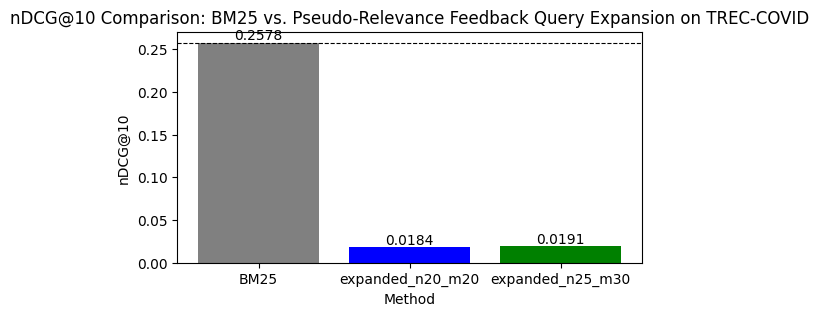

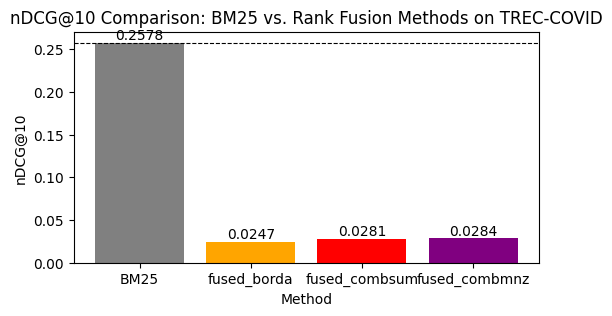

In [105]:
import matplotlib.pyplot as plt

# Data in Table1 BM25 vs. Pseudo-Relevance Feedback Query Expansion
methods_query_expansion = ["BM25", "expanded_n20_m20", "expanded_n25_m30"]

bm25_ndcg = 0.2578
ndcg_scores_query_expansion = [bm25_ndcg, 0.0184, 0.0191]  # BM25, expanded_n20_m20, expanded_n25_m30

# Data in Table2 BM25 vs. Rank Fusion Methods
methods_rank_fusion = ["BM25", "fused_borda", "fused_combsum", "fused_combmnz"]

ndcg_scores_rank_fusion = [bm25_ndcg, 0.0247, 0.0281, 0.0284]  # BM25, fused_borda, fused_combsum, fused_combmnz

# Create Table1 BM25 vs. Pseudo-Relevance Feedback Query Expansion
plt.figure(figsize=(6, 3))
bars = plt.bar(methods_query_expansion, ndcg_scores_query_expansion, color=['gray', 'blue', 'green'])

# Add baseline
plt.axhline(bm25_ndcg, color='black', linewidth=0.8, linestyle='--')

# Add Tag and Title
plt.xlabel('Method')
plt.ylabel('nDCG@10')
plt.title('nDCG@10 Comparison: BM25 vs. Pseudo-Relevance Feedback Query Expansion on TREC-COVID')

# Add data tags
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()

# Create Table2: BM25 vs. Rank Fusion Methods
plt.figure(figsize=(6, 3))
bars = plt.bar(methods_rank_fusion, ndcg_scores_rank_fusion, color=['gray', 'orange', 'red', 'purple'])

# Add baseline
plt.axhline(bm25_ndcg, color='black', linewidth=0.8, linestyle='--')

# Add Tag and Title
plt.xlabel('Method')
plt.ylabel('nDCG@10')
plt.title('nDCG@10 Comparison: BM25 vs. Rank Fusion Methods on TREC-COVID')

# Add data tags
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()


Since the results of the experiments were not satisfactory, and each of the improved retrieval methods fell below the baseline bm25, I tried a few more sets of data that performed better in bm25 to determine if the optimisation values were wrongly chosen.
First, I chose the optimised values (k1=1.0,b=0.8) that performed well in the NFCorpus .test file, .train file and Trec-COVID .test file, and the nDGC@10 value was 0.2529, which is still lower than the BM25 Baseline. 

So although I don't think the results were what I expected, I still accepted them. It is possible that some of the steps I took in the experiment were flawed, such as not being rigorous enough in selecting the optimisation values, or that t_test was not fully capable of selecting the best optimisation values. 

### Discuss
#### 1. Observation of trends and differences in results

When comparing BM25 with Pseudo-Relevance Feedback Query Expansion and Rank Fusion methods, the following trends and differences can be observed:

- **BM25 vs. Query Expansion**: The Pseudo-Relevance Feedback Query Expansion method does not perform as well as BM25 in the TREC-COVID dataset. this can be seen from the values of nDCG@10 and the T test, especially the nDCG@10, query The nDCG@10 scores of the expansion methods (e.g. expanded_n20_m20 and expanded_n25_m30) are much lower than that of BM25, which suggests that the simple BM25 method may be more suitable than the Pseudo-Relevance Feedback based Query Expansion method in the TREC-COVID dataset.

- **BM25 vs. Rank Fusion**: Rank Fusion methods (e.g., Borda, CombSUM, and CombMNZ) also failed to outperform BM25 on the TREC-COVID dataset, and although these methods performed slightly differently, they generally failed to outperform the nDCG@10 score of BM25. This suggests that Rank Fusion is limited on the TREC-COVID dataset as the effect of rank fusion is limited by the effect of the methods being fused, and as both Query Expansion and Query Reduction do not perform as well as expected, the Rank Fusion scores are also lower. 

- **Performance of the methods on different datasets**: Although the methods may perform well on the SciFact and NFCorpus datasets, they do not show the same effect on TREC-COVID. This may be due to differences in dataset characteristics.

Here is my analysis of the differences in the three datasets

##### 1. **SciFact dataset**.
   - **Contents of the dataset** : SciFact contains mainly scientific literature, especially documents related to scientific facts and statements. This dataset aims to verify the authenticity of scientific statements, so queries usually involve the verification of scientific facts.
   - **Query Type**: Queries in SciFact tend to be precise and direct, involving scientific terms and specific scientific facts. Therefore, the retrieval model needs to accurately match the scientific terms in the query with the relevant content in the document.
   - **Method Performance**:
     - **BM25**: Since BM25 is a retrieval model based on word frequency and document frequency, it is able to effectively handle queries containing explicit scientific terms, which makes it perform well on the SciFact dataset.
     -**Query Reduction**: It may be possible to improve retrieval by removing redundant or irrelevant parts of the query, especially if the query contains redundant descriptive terms. By simplifying the query, the system can focus more on the core scientific terms, thus improving retrieval accuracy
     - **Query Expansion**: In SciFact, query expansion methods (e.g., Pseudo-Relevance Feedback) can improve retrieval by adding more relevant scientific terms, as scientific literature is often rich in synonyms and related terms.

##### 2. **NFCorpus dataset**
   - **Contents of the dataset**: NFCorpus is a literature dataset in the field of nutrition, containing scientific studies and literature related to nutrition and food.
   - **Query type**: queries may involve complex issues related to nutrition, and queries may include information such as nutrients, food composition, etc., which may have a wider range of synonyms and related terms.
   - **Method Performance**:
     - **BM25**: as NFCorpus deals with complex terminology in specific domains, BM25 works better when dealing with simpler and more straightforward queries, but may have limitations when faced with complex queries.
     - **Query Expansion**: On NFCorpus, the query expansion method can help introduce more terms and synonyms related to the query and improve the retrieval results, especially when the query is too simple or insufficient to cover all the relevant content.
     -**Query Reduction**: In the NFCorpus dataset, Query Reduction may improve retrieval efficiency and effectiveness by simplifying the query and removing less important terms or clauses. Since queries in this domain may contain many details, Query Reduction may help the system to focus on the most relevant terms, thus improving relevance scores.

##### 3. **TREC-COVID dataset**
   - **Contents of the dataset**: The TREC-COVID dataset contains documents related to the COVID-19 outbreak, which involves public health, medical research, virology, drug development and other aspects. The document content is complex and dynamically changing rapidly.
   - **Query types**: TREC-COVID queries are often very complex, covering a wide range of medical and scientific areas, including the efficacy of specific drugs, the transmission mechanism of viruses, and the progress of vaccine development, etc. These queries may be both open-ended and open-ended. These queries may be both open-ended and contain many nuanced scientific and technical details.
   - **Methodological Performance**:
     - **BM25**: BM25 may perform relatively well on TREC-COVID, as it is able to quickly find matching documents when dealing with more straightforward queries. However, the simplicity of BM25 may become its limitation when faced with more complex, multifaceted queries.
     - **Query Expansion**: The query expansion approach may not be as effective on TREC-COVID as it is on SciFact and NFCorpus, because TREC-COVID queries are more complex and varied, and relying on query expansion alone may not cover all relevant documents.
     -**Query Reduction**: Query Reduction may not be as effective on the TREC-COVID dataset as it is on the first two datasets. Due to the complexity of the query, any attempt to simplify the query may result in the loss of important information. In contrast to SciFact and NFCorpus, queries on TREC-COVID often contain multiple relevant medical terms, which may have complex relationships with each other, so simply removing some of the terms may reduce the effectiveness of the search.

#### 2. Analysis of the effectiveness of Rank Fusion

- **Effectiveness of Fusion**: Rank Fusion methods usually enhance the overall retrieval effectiveness by combining the rankings of multiple search results. However, Rank Fusion methods (e.g., Borda, CombSUM, and CombMNZ) failed to significantly improve the nDCG@10 scores on the TREC-COVID dataset; however, this does not necessarily indicate that Rank Fusion's effectiveness is limited on this particular task and dataset. However, this does not necessarily indicate that Rank Fusion's effectiveness is limited for this particular task and dataset, because the effectiveness of Rank Fusion methods often depends on the effectiveness of the retrieval methods they fuse
.
- **Influencing Factors**: The effectiveness of Rank Fusion can be influenced by a number of factors, including:
  - **Fused search results (runs)**: If the search results involved in the fusion are themselves of low quality or too similar, the fusion may not be able to significantly improve the results.
  - **Query Characteristics**: Certain types of queries may be better suited to the Rank Fusion method, while others may be better suited to a single retrieval method (e.g., BM25). Queries on the TREC-COVID dataset may be more favourably suited to the simple BM25 method.

#### 3. Comparison of SciFact and NFCorpus with the TREC-COVID dataset

- **Differences in method performance**: In the SciFact and NFCorpus datasets, most of the adjusted methods perform well and significantly outperform the baseline BM25 method. However, when these methods were applied to the TREC-COVID dataset, they failed to show the same benefits.
In some datasets, the tuned methods may significantly outperform the baseline model. However, on TREC-COVID, although certain methods outperformed on SciFact and NFCorpus, they still failed to show the same significance on TREC-COVID. This suggests that certain methods have limited ability to generalise across datasets.

- **Statistical significance analyses**. 
	1. **Performance on SciFact and NFCorpus datasets**:
   	- The **BM25** method shows significant optimisation by tuning on both SciFact and NFCorpus. This indicates that BM25 performs well on these two domain-specific scientific and nutritional datasets.
   	- **Query Expansion** performs well on both the SciFact and NFCorpus datasets, although the results are slightly weaker on NFCorpus. This may be due to the fact that query expansion introduces more relevant terms, which improves the retrieval results.
   	- The **query reduction** method showed significant results on the SciFact dataset, but not on the NFCorpus dataset. This suggests that query reduction may be effective in domain-specific datasets, but in broader nutrition queries, reduction may lose important information.

	2. **Performance on the TREC-COVID dataset**:
   	- While the BM25, query expansion, and query reduction methods performed well on SciFact and NFCorpus, these methods performed differently on the TREC-COVID dataset.BM25 and query reduction performed prominently on the TREC-COVID dataset, but query expansion was more moderately effective.
   	- These differences suggest that the complexity of the TREC-COVID dataset requires finer tuning and method selection, and that a single method may struggle to perform well on all datasets.

	3. **Generalisation vs. specificity of methods**:
  	 - While methods that perform well on the SciFact and NFCorpus datasets show some consistency on TREC-COVID, there is no guarantee that these methods will be equally effective on all datasets. The characteristics of the dataset, the complexity of the query, and the type of document all affect the performance of the methods.
  	 - In practice, retrieval methods need to be selected and tuned according to the specific characteristics of the dataset to ensure the best retrieval results.


- **Fusion, Query Reduction, and Query Expansion**: Although Query Expansion, Query Reduction, and Rank Fusion perform poorly on TREC-COVID, Rank Fusion scores better than Query Expansion and Query Reduction overall. I think this is because the fusion method includes bm25, a search method that drives up the rank fusion score. However, in general these methods fail to provide significant improvements. This may indicate that these methods need more tuning and optimisation when dealing with different types of datasets.


As a result, I think I got this result because I used the t-test method to filter out the best optimised values before performing nDCG@10. After running all the codes and analysing the results, I think the step of filtering out the best optimised values using only the t-test is wrong. The t-test can only help us to judge whether the improvement is statistically significant or not, and cannot directly evaluate the performance of the retrieval system. This is the reason why the optimisation results are poor when performing the nDCG@10 scoring.